<a id="toc"></a>
<p style="font-family:verdana; font-size:40px;"><center>Customer Personality Analysis and Segmentation</center></p>
<hr>


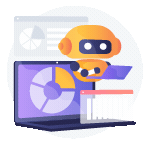

<a id="1"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors

import warnings
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import gdown

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Define the Google Drive file IDs
train_file_id = '1P-Pv0z9bOxdjn28yyBGRuNWpSK5p0GCe'

# Create the download URLs
train_download_url = f'https://drive.google.com/uc?id={train_file_id}'

# Download the files
gdown.download(train_download_url, 'customer_personality.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1P-Pv0z9bOxdjn28yyBGRuNWpSK5p0GCe
To: /content/customer_personality.csv
100%|██████████| 205k/205k [00:00<00:00, 46.4MB/s]


'customer_personality.csv'

In [ ]:
# Load the files into dataframes
data = pd.read_csv('customer_personality.csv')

<a id="2"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

In [ ]:
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2216


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebPurchases  NumCatalogPurchases  \
0  2012-04-09       58       635  ...                8                   10   
1  2014-08-03       38        11  ...                1                    1   
2  2013-08-21       26       426  ...                8                    2   
3  2014-10-02       26        11  ...                2                    0   
4  2014-01-19       94       173  ...                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  
0             0             0             0         1  
1             0             0             0         0  
2             0             0             0         0  
3             0             0             0         0  
4             0             0             0         0  

[5 rows x 26 columns]

**The dataset is provided by Dr. Omar Romero-Hernandez.**

* **ID:** Customer's unique identifier
* **Year_Birth:** Customer's birth year
* **Education:** Customer's education level
* **Marital_Status:** Customer's marital status
* **Income:** Customer's yearly household income
* **Kidhome:** Number of children in customer's household
* **Teenhome:** Number of teenagers in customer's household
* **Dt_Customer:** Date of customer's enrollment with the company
* **Recency:** Number of days since customer's last purchase
* **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise
* **MntWines:** Amount spent on wine in last 2 years
* **MntFruits:** Amount spent on fruits in last 2 years
* **MntMeatProducts:** Amount spent on meat in last 2 years
* **MntFishProducts:** Amount spent on fish in last 2 years
* **MntSweetProducts:** Amount spent on sweets in last 2 years
* **MntGoldProds:** Amount spent on gold in last 2 years
* **NumDealsPurchases:** Number of purchases made with a discount
* **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise
* **NumWebPurchases:** Number of purchases made through the company’s website
* **NumCatalogPurchases:** Number of purchases made using a catalogue
* **NumStorePurchases:** Number of purchases made directly in stores
* **NumWebVisitsMonth:** Number of visits to company’s website in the last month

<a id="3"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</p>


**Let's have a glimpse of the dataset.**

In [ ]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame()

Null values of the Dataset :


0
ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumDealsPurchases    0
NumWebPurchases      0
NumCatalogPurchases  0
NumStorePurchases    0
NumWebVisitsMonth    0
AcceptedCmp3         0
AcceptedCmp4         0
AcceptedCmp5         0
AcceptedCmp1         0
AcceptedCmp2         0
Response             0

In [ ]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDeal

In [ ]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


<a id="5"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print(f"Newest customer's enrolment date is {max(dates)}")
print(f"Oldest customer's enrolment date is {min(dates)}")

Newest customer's enrolment date is 2014-12-06
Oldest customer's enrolment date is 2012-01-08


In [ ]:
days = []
newest = max(dates)
for i in dates:
    duration = newest - i
    days.append(duration)
data["Customer_Loyalty"] = days
data["Customer_Loyalty"] = data["Customer_Loyalty"].dt.days
data["Age"] = 2015 - data["Year_Birth"]
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Parental_Status"] = np.where(data["Children"] > 0, 1, 0)
data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"}, inplace = True)
data["Family_Size"] = data["Marital_Status"].replace({"Alone": 1, "Partner":2})+ data["Children"]
data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}, inplace = True)
data["Total Promo"] =  data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

# remove outlier
data = data[data["Age"] < 90]
data = data[data["Income"] < 600000]

In [ ]:
# Rename features
data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog","NumStorePurchases":"Store","NumDealsPurchases":"Number_Purchases", "NumWebVisitsMonth":"Visit"}, inplace = True)

In [ ]:
print("Dataset after preprocessing:")
data

Dataset after preprocessing:


ID  Year_Birth     Education Marital_Status   Income  Kidhome  \
0      5524        1957      Graduate          Alone  58138.0        0   
1      2174        1954      Graduate          Alone  46344.0        1   
2      4141        1965      Graduate        Partner  71613.0        0   
3      6182        1984      Graduate        Partner  26646.0        1   
4      5324        1981  Postgraduate        Partner  58293.0        1   
...     ...         ...           ...            ...      ...      ...   
2211  10870        1967      Graduate        Partner  61223.0        0   
2212   4001        1946  Postgraduate        Partner  64014.0        2   
2213   7270        1981      Graduate          Alone  56981.0        0   
2214   8235        1956  Postgraduate        Partner  69245.0        0   
2215   9405        1954  Postgraduate        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  Wines  ...  AcceptedCmp1  AcceptedCmp2  \
0            0  2012-04-09       58    635  ...             0             0   
1            1  2014-08-03       38     11  ...             0             0   
2            0  2013-08-21       26    426  ...             0             0   
3            0  2014-10-02       26     11  ...             0             0   
4            0  2014-01-19       94    173  ...             0             0   
...        ...         ...      ...    ...  ...           ...           ...   
2211         1  2013-06-13       46    709  ...             0             0   
2212         1  2014-10-06       56    406  ...             1             0   
2213         0  2014-01-25       91    908  ...             0             0   
2214         1  2014-01-24        8    428  ...             0             0   
2215         1  2012-10-15       40     84  ...             0             0   

      Response  Customer_Loyalty  Age  Spent  Children  Parental_Status  \
0            1               971   58   1617         0                0   
1            0               125   61     27         2                1   
2            0               472   50    776         0                0   
3            0                65   31     53         1                1   
4            0               321   34    422         1                1   
...        ...               ...  ...    ...       ...              ...   
2211         0               541   48   1341         1                1   
2212         0                61   69    444         3                1   
2213         0               315   34   1241         0                0   
2214         0               316   59    843         1                1   
2215         1               782   61    172         2                1   

      Family_Size  Total Promo  
0               1            0  
1               3            0  
2               2            0  
3               3            0  
4               3            0  
...           ...          ...  
2211            3            0  
2212            5            1  
2213            1            1  
2214            3            0  
2215            4            0  

[2212 rows x 33 columns]

In [ ]:
print(f"Informations Of Preprocessed Dataset :\n")
print(data.info())

Informations Of Preprocessed Dataset :

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2215
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                2212 non-null   int64         
 1   Year_Birth        2212 non-null   int64         
 2   Education         2212 non-null   object        
 3   Marital_Status    2212 non-null   object        
 4   Income            2212 non-null   float64       
 5   Kidhome           2212 non-null   int64         
 6   Teenhome          2212 non-null   int64         
 7   Dt_Customer       2212 non-null   datetime64[ns]
 8   Recency           2212 non-null   int64         
 9   Wines             2212 non-null   int64         
 10  Fruits            2212 non-null   int64         
 11  Meat              2212 non-null   int64         
 12  Fish              2212 non-null   int64         
 13  Sweets            2212 non-null   int64    

In [ ]:
print(f"Summary Of The Dataset :")
data.describe()

Summary Of The Dataset :


ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2212.000000  2212.000000    2212.000000  2212.000000  2212.000000   
mean    5585.160940  1968.913653   51958.810579     0.441682     0.505877   
min        0.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35233.500000     0.000000     0.000000   
50%     5454.500000  1970.000000   51371.000000     0.000000     0.000000   
75%     8418.500000  1977.000000   68487.000000     1.000000     1.000000   
max    11191.000000  1996.000000  162397.000000     2.000000     2.000000   
std     3247.523735    11.701599   21527.278844     0.536955     0.544253   

                         Dt_Customer      Recency        Wines       Fruits  \
count                           2212  2212.000000  2212.000000  2212.000000   
mean   2013-07-11 20:32:19.963833600    49.019439   305.287523    26.329566   
min              2012-01-08 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-19 00:00:00    24.000000    24.000000     2.000000   
50%              2013-07-11 00:00:00    49.000000   175.500000     8.000000   
75%              2013-12-31 00:00:00    74.000000   505.000000    33.000000   
max              2014-12-06 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.943121   337.322940    39.744052   

              Meat  ...  AcceptedCmp1  AcceptedCmp2     Response  \
count  2212.000000  ...   2212.000000   2212.000000  2212.000000   
mean    167.029837  ...      0.064195      0.013562     0.150542   
min       0.000000  ...      0.000000      0.000000     0.000000   
25%      16.000000  ...      0.000000      0.000000     0.000000   
50%      68.000000  ...      0.000000      0.000000     0.000000   
75%     232.250000  ...      0.000000      0.000000     0.000000   
max    1725.000000  ...      1.000000      1.000000     1.000000   
std     224.254493  ...      0.245156      0.115691     0.357683   

       Customer_Loyalty          Age        Spent     Children  \
count       2212.000000  2212.000000  2212.000000  2212.000000   
mean         512.144213    46.086347   607.268083     0.947559   
min            0.000000    19.000000     5.000000     0.000000   
25%          340.000000    38.000000    69.000000     0.000000   
50%          513.000000    45.000000   397.000000     1.000000   
75%          686.000000    56.000000  1048.000000     1.000000   
max         1063.000000    75.000000  2525.000000     3.000000   
std          232.551465    11.701599   602.513364     0.749466   

       Parental_Status  Family_Size  Total Promo  
count      2212.000000  2212.000000  2212.000000  
mean          0.714286     2.593128     0.298373  
min           0.000000     1.000000     0.000000  
25%           0.000000     2.000000     0.000000  
50%           1.000000     3.000000     0.000000  
75%           1.000000     3.000000     0.000000  
max           1.000000     5.000000     4.000000  
std           0.451856     0.906236     0.679570  

[8 rows x 31 columns]

In [ ]:
data.describe(include=object)

Education Marital_Status
count       2212           2212
unique         3              2
top     Graduate        Partner
freq        1115           1428

<a id="6"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

In [ ]:
sns.set_style("white")
# Setting up colors preferences
sns.set(rc={"axes.facecolor":"#FFF9ED", "figure.facecolor":"#FFF9ED"})
sns.set_context("poster",font_scale = .7)

palette = ["#524545","#60E0EB","#69D9E2","#FAF7F5","#FA991C","#1C768F","#032539"]
palette_cmap = ["#524545","#60E0EB","#69D9E2","#FAF7F5","#FA991C","#1C768F","#032539"]
cluster = ["#524545","#60E0EB","#69D9E2","#FAF7F5","#FA991C","#1C768F","#032539"]

<a id="7"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Digging Deeper</p>

The distribution of customer's age :


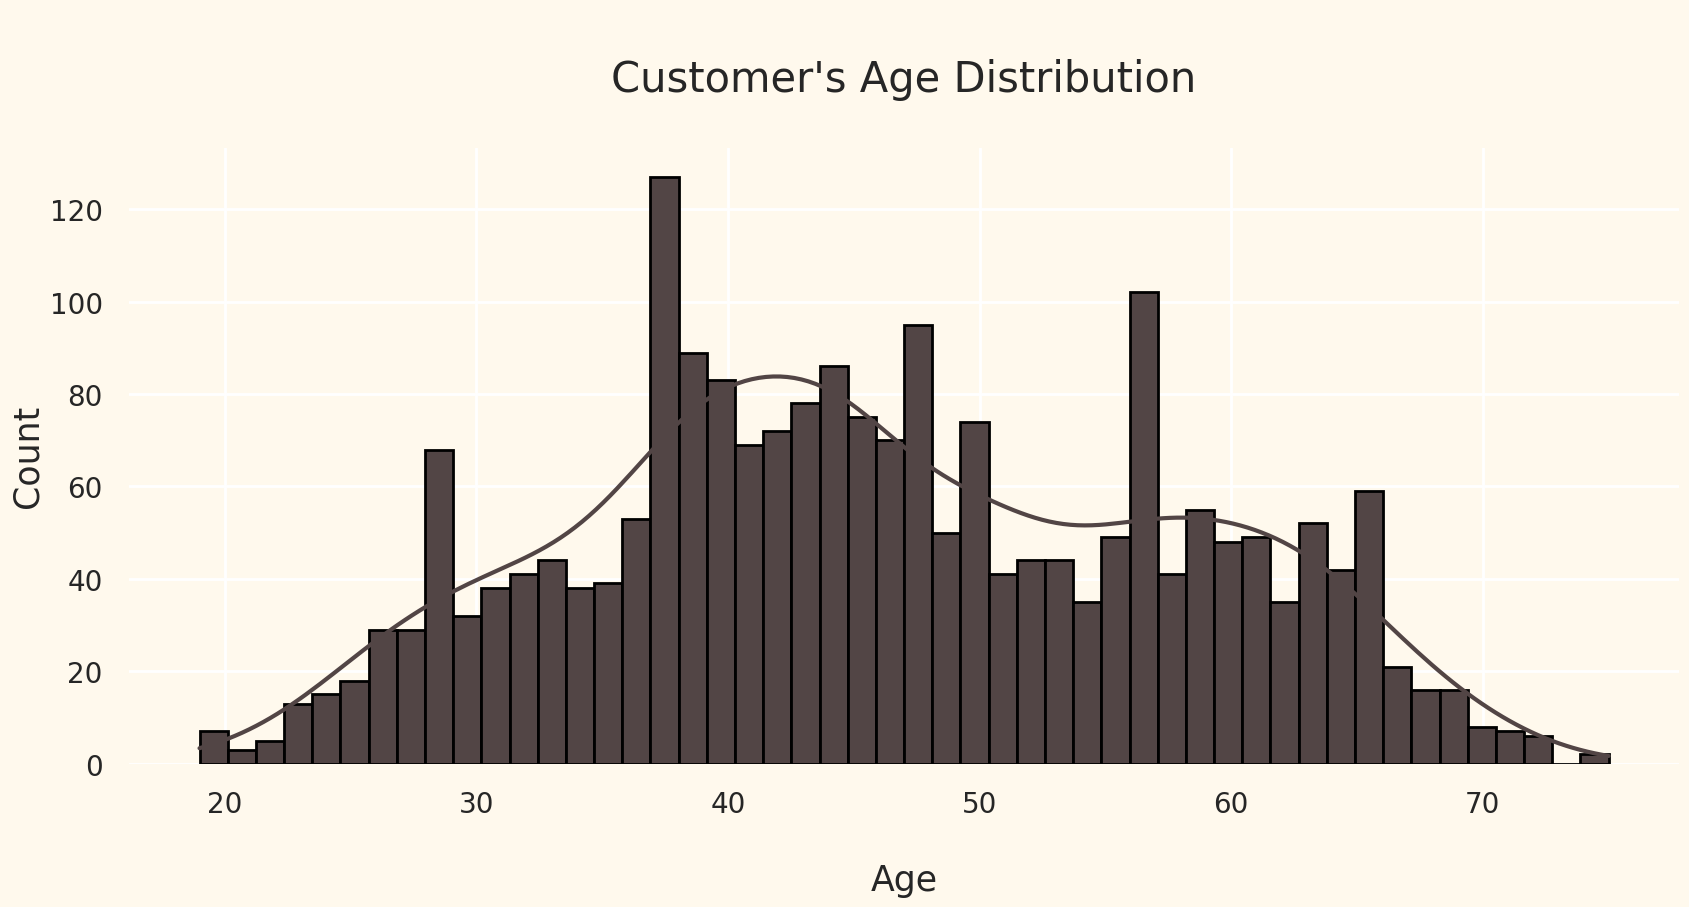

In [ ]:
print(f"The distribution of customer's age :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["Age"],color="#524545",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color(palette[0])
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=30)
p.axes.set_xticklabels(p.axes.get_xticklabels(), fontsize=20)  # Set fontsize for x-axis labels
p.axes.set_yticklabels(p.axes.get_yticklabels(), fontsize=20)
plt.ylabel("Count",fontsize=25)
plt.xlabel("\nAge",fontsize=25)
sns.despine(left=True, bottom=True)

plt.show()

Customer's income and spending :


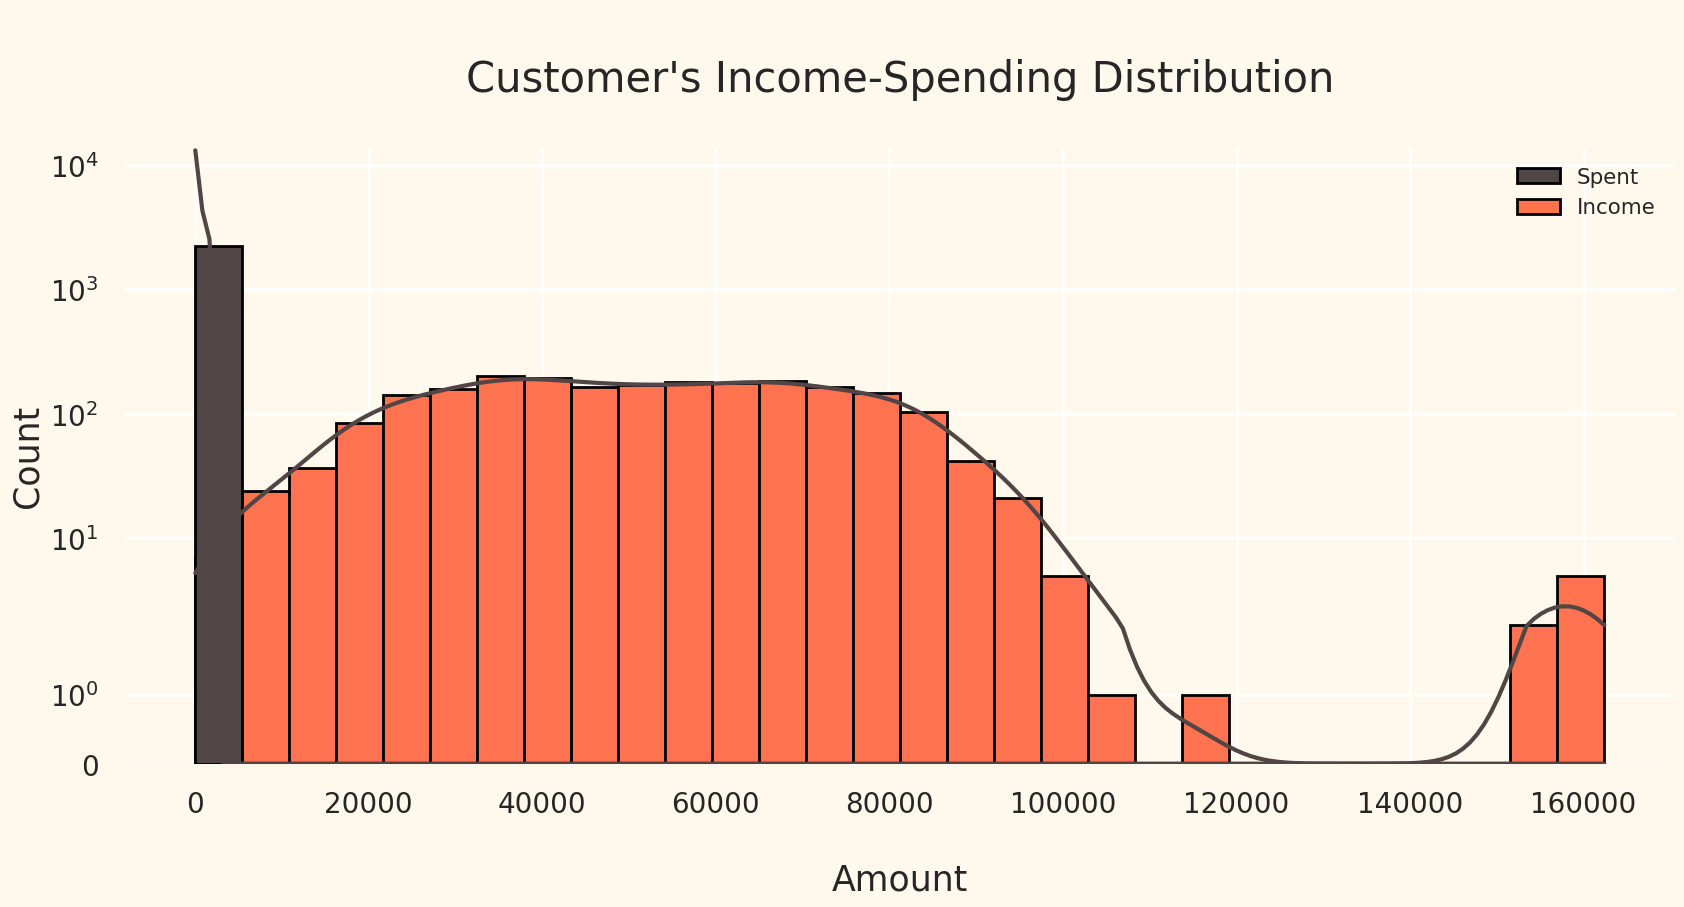

In [ ]:
print(f"Customer's income and spending :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data[["Spent","Income"]],palette=["#524545","#FF7350","#42CDE7","#1C768F"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color(palette[0])
p.axes.lines[1].set_color(palette[0])
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=30)
plt.ylabel("Count",fontsize=25)
plt.xlabel("\nAmount",fontsize=25)
p.axes.set_xticklabels(p.axes.get_xticklabels(), fontsize=20)  # Set fontsize for x-axis labels
p.axes.set_yticklabels(p.axes.get_yticklabels(), fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

Customer's education :


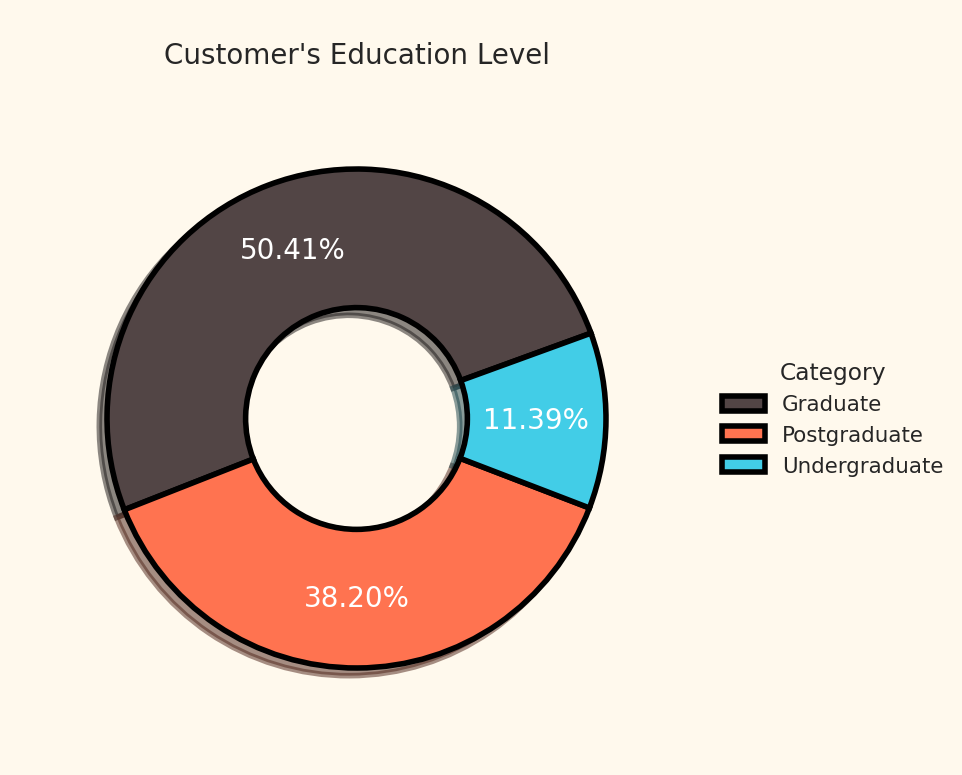

In [ ]:
print(f"Customer's education :")
plt.subplots(figsize=(9, 9))

labels = "Graduate","Postgraduate","Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie([data["Education"].value_counts()[0],
                                    data["Education"].value_counts()[1],
                                    data["Education"].value_counts()[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = ["#524545","#FF7350","#42CDE7","#1C768F"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20)
plt.show()

The distribution of customer's income and spending on basis of education level :


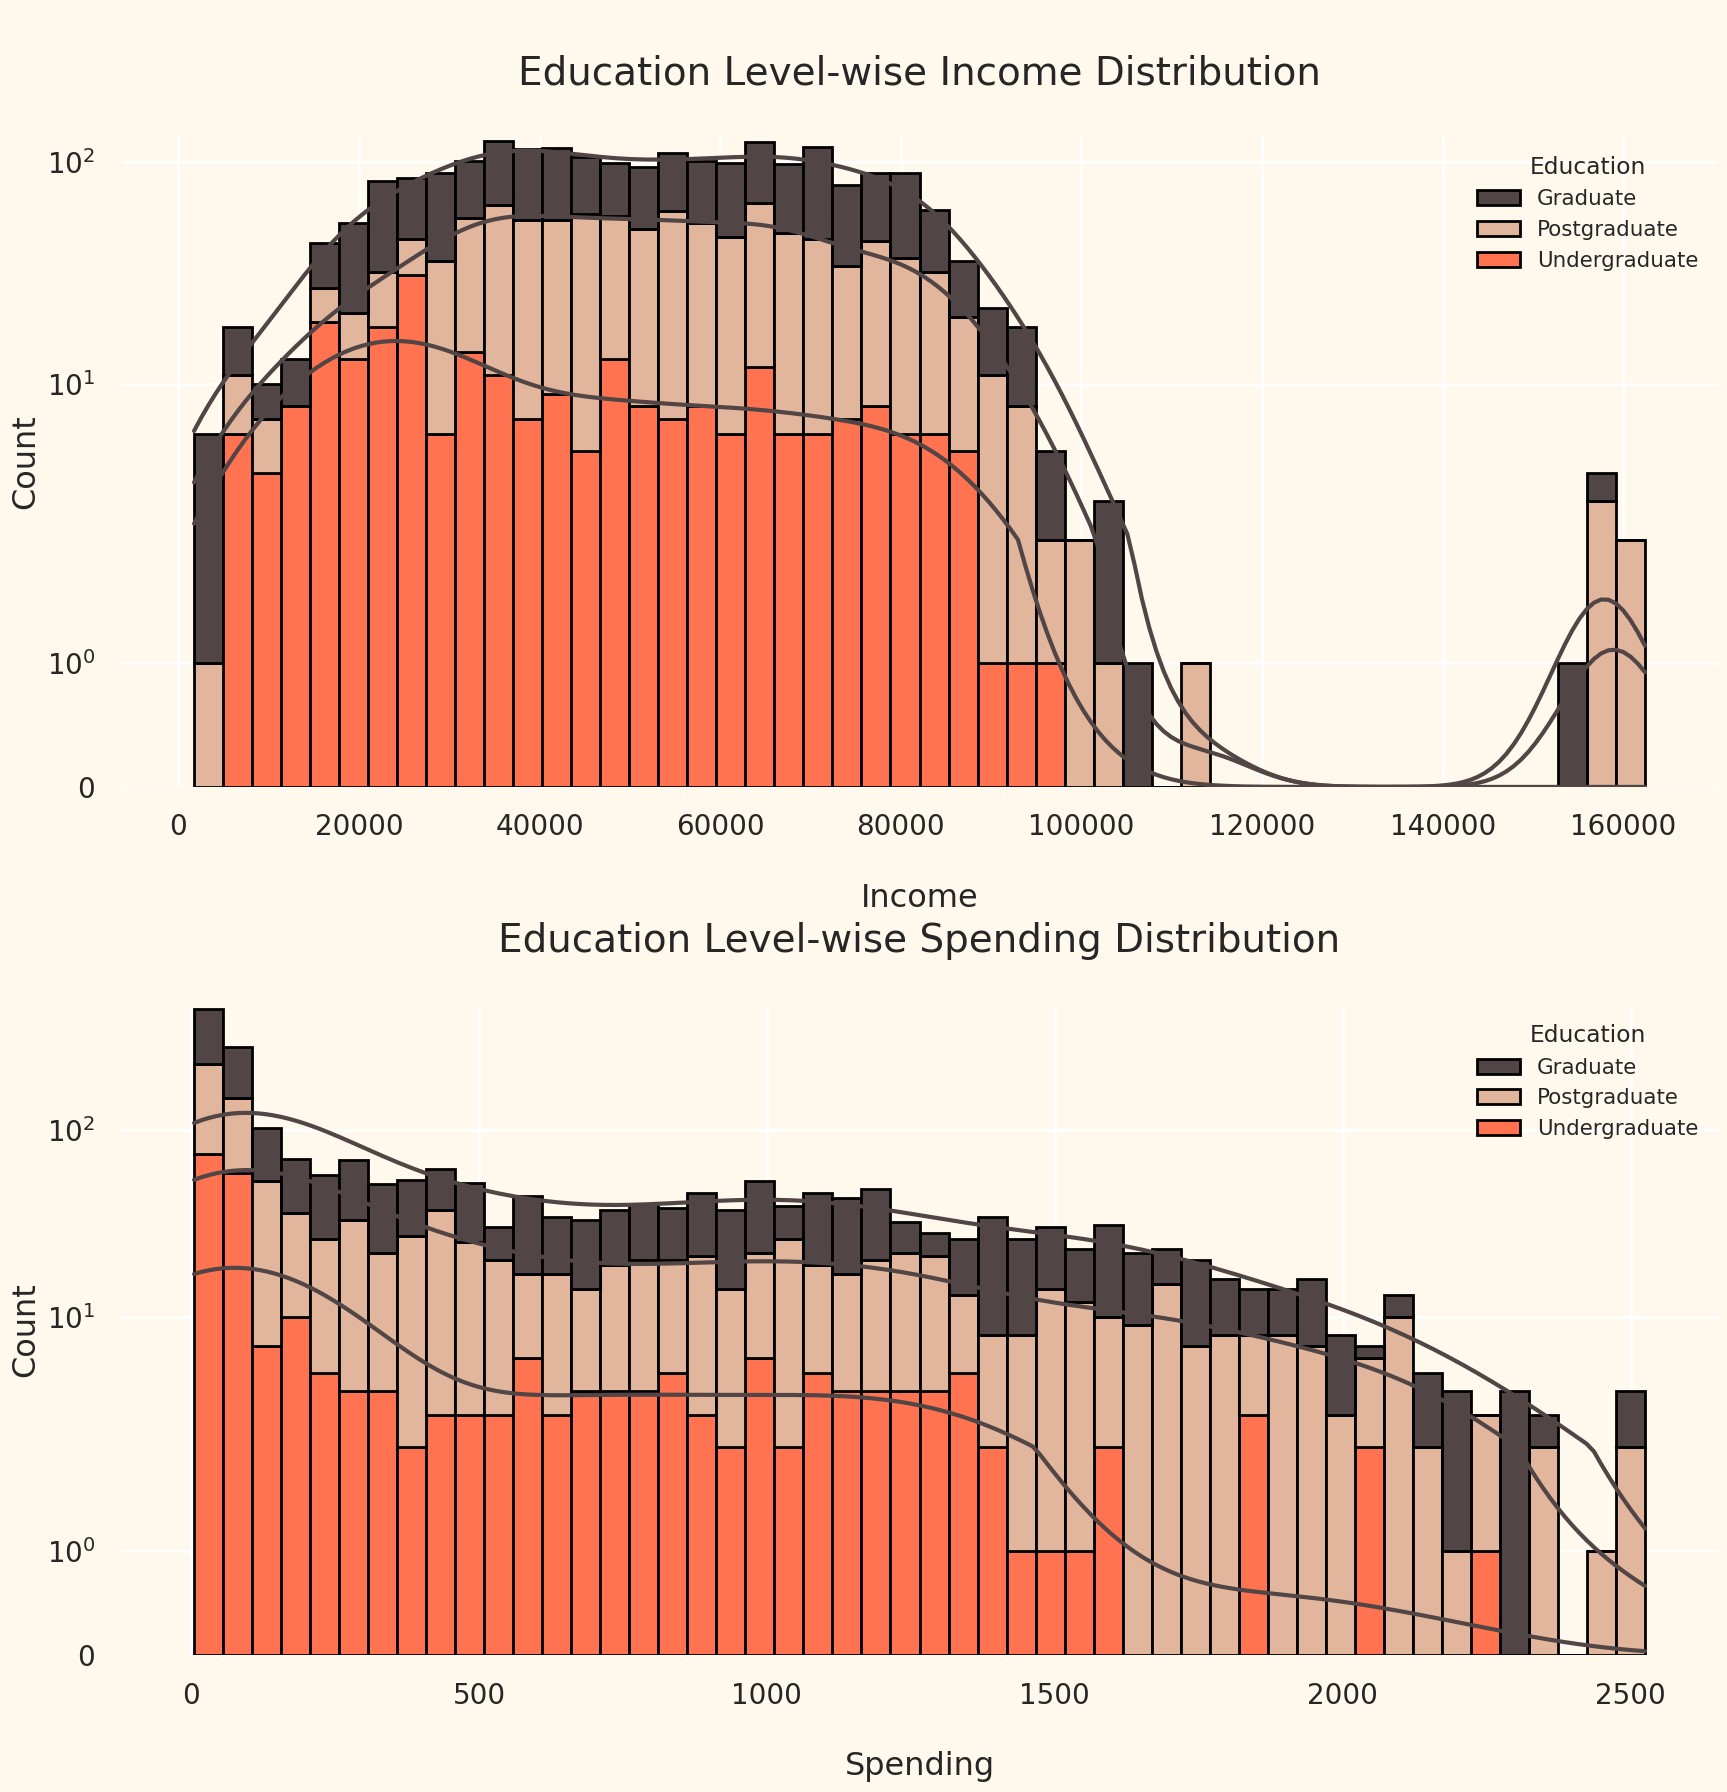

In [ ]:
print("The distribution of customer's income and spending on basis of education level :")

_, axes = plt.subplots(2, 1, figsize=(20, 19), sharex=False)
plt.tight_layout(pad=7.0)

# Histogram for Income
sns.histplot(data=data, x="Income", hue="Education", multiple="stack", palette=["#524545","#E1B69D","#FF7350"], ax=axes[0], kde=True, bins=50, alpha=1, fill=True, edgecolor="black")
axes[0].lines[0].set_color(palette[0])
axes[0].lines[1].set_color(palette[0])
axes[0].lines[2].set_color(palette[0])
axes[0].set_yscale("symlog")
axes[0].set_title("\nEducation Level-wise Income Distribution\n", fontsize=28)
axes[0].set_ylabel("Count", fontsize=23)
axes[0].set_xlabel("\nIncome", fontsize=23)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=20)  # Set fontsize for x-axis labels
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=20)  # Set fontsize for y-axis labels

# Histogram for Spending
sns.histplot(data=data, x="Spent", hue="Education", multiple="stack", palette=["#524545","#E1B69D","#FF7350"], ax=axes[1], kde=True, bins=50, alpha=1, fill=True, edgecolor="black")
axes[1].lines[0].set_color(palette[0])
axes[1].lines[1].set_color(palette[0])
axes[1].lines[2].set_color(palette[0])
axes[1].set_yscale("symlog")
axes[1].set_title("\nEducation Level-wise Spending Distribution\n", fontsize=28)
axes[1].set_ylabel("Count", fontsize=23)
axes[1].set_xlabel("\nSpending", fontsize=23)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=20)  # Set fontsize for x-axis labels
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=20)  # Set fontsize for y-axis labelss

sns.despine(left=True, bottom=True)
plt.show()


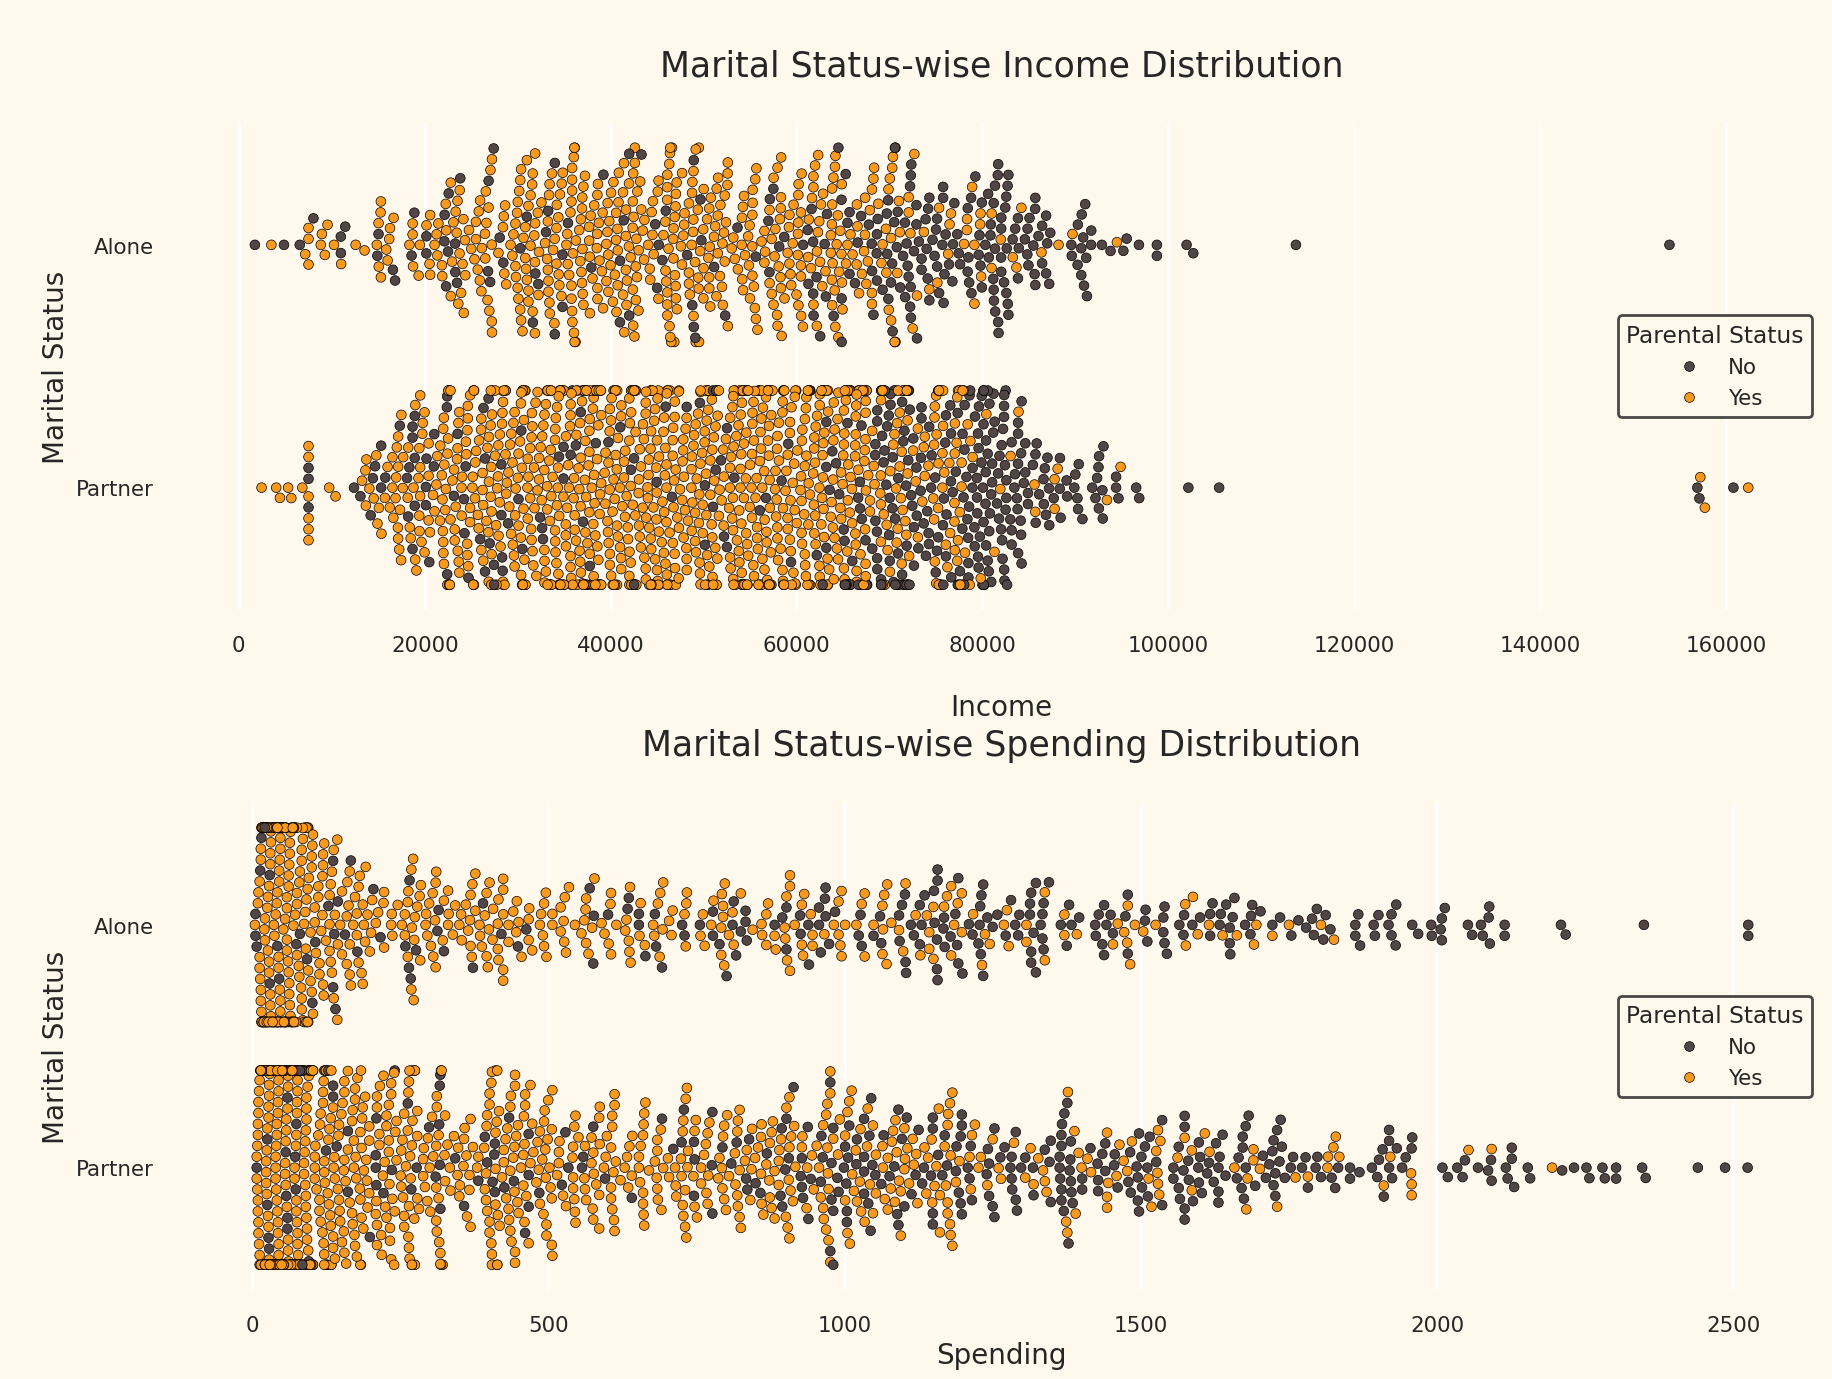

In [ ]:
# Plotting
_, axes = plt.subplots(2, 1, figsize=(20, 15), sharex=False)
plt.tight_layout(pad=6.0)

# Income Distribution Plot
sns.swarmplot(x=data["Income"], y=data["Marital_Status"], hue=data["Parental_Status"].astype('category'),
              palette=["#524545","#FA991C"], ax=axes[0], marker="o", size=7, alpha=1, linewidth=0.5, edgecolor="black")
axes[0].set_title("\nMarital Status-wise Income Distribution\n", fontsize=25)
axes[0].set_xlabel("\nIncome", fontsize=20)
axes[0].set_ylabel("\nMarital Status", fontsize=20)

# Adjusting the legend to display "No" and "Yes"
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ["No", "Yes"], title="Parental Status", edgecolor="#1c1c1c", loc="center right", frameon=True)

# Spending Distribution Plot
sns.swarmplot(x=data["Spent"], y=data["Marital_Status"], hue=data["Parental_Status"].astype('category'),
              palette=["#524545","#FA991C"], ax=axes[1], marker="o", size=7, alpha=1, linewidth=0.5, edgecolor="black")
axes[1].set_title("\nMarital Status-wise Spending Distribution\n", fontsize=25)
axes[1].set_xlabel("Spending", fontsize=20)
axes[1].set_ylabel("\nMarital Status", fontsize=20)

# Adjusting the legend to display "No" and "Yes"
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, ["No", "Yes"], title="Parental Status", edgecolor="#1c1c1c", loc="center right", frameon=True)

# Remove the spines for a cleaner look
sns.despine(left=True, bottom=True)

# Display the plots
plt.show()

The distribution of customer's children :


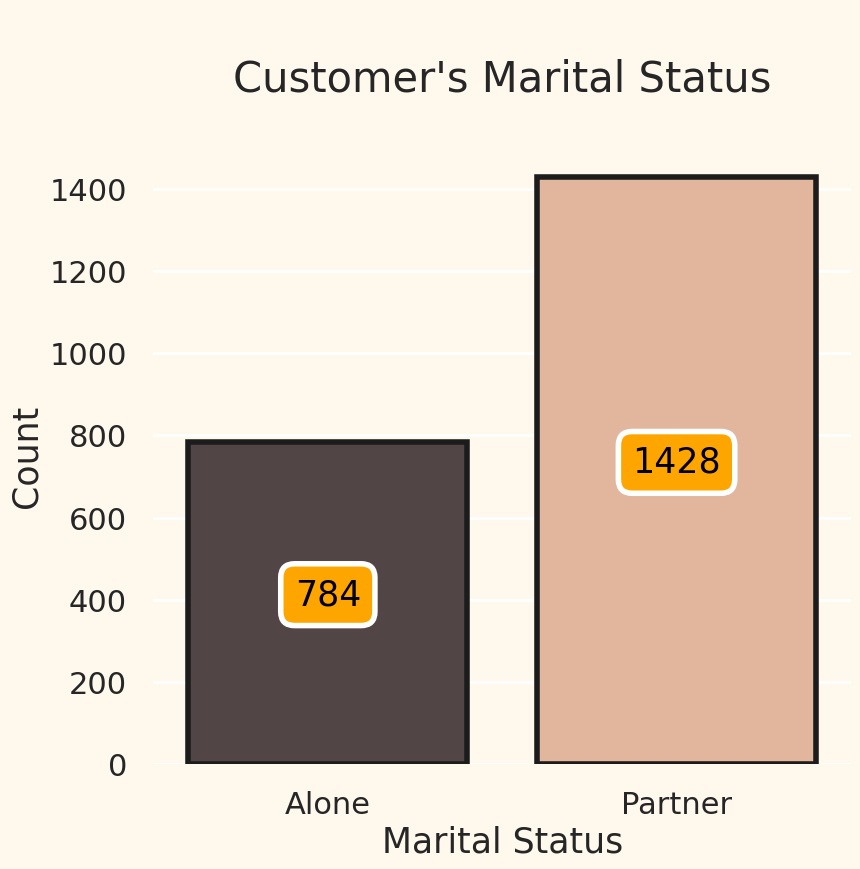

In [ ]:
print("The distribution of customer's children :")
plt.subplots(figsize=(9, 8))
p = sns.countplot(x=data["Marital_Status"], palette=["#524545","#E1B69D","#FF7350","#42CDE7"], saturation=1, edgecolor="#1c1c1c", linewidth=4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Marital Status\n", fontsize=30)
p.axes.set_ylabel("Count", fontsize=25)
p.axes.set_xlabel("Marital Status", fontsize=25)
p.axes.set_xticklabels(p.get_xticklabels(), rotation=0, fontsize=22)  # Set fontsize for x-axis labels
p.axes.set_yticklabels(p.axes.get_yticklabels(), fontsize=22)  # Set fontsize for y-axis labels

for container in p.containers:
    p.bar_label(container, label_type="center", padding=6, size=25, color="black", rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth": 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

The distribution of customer's children :


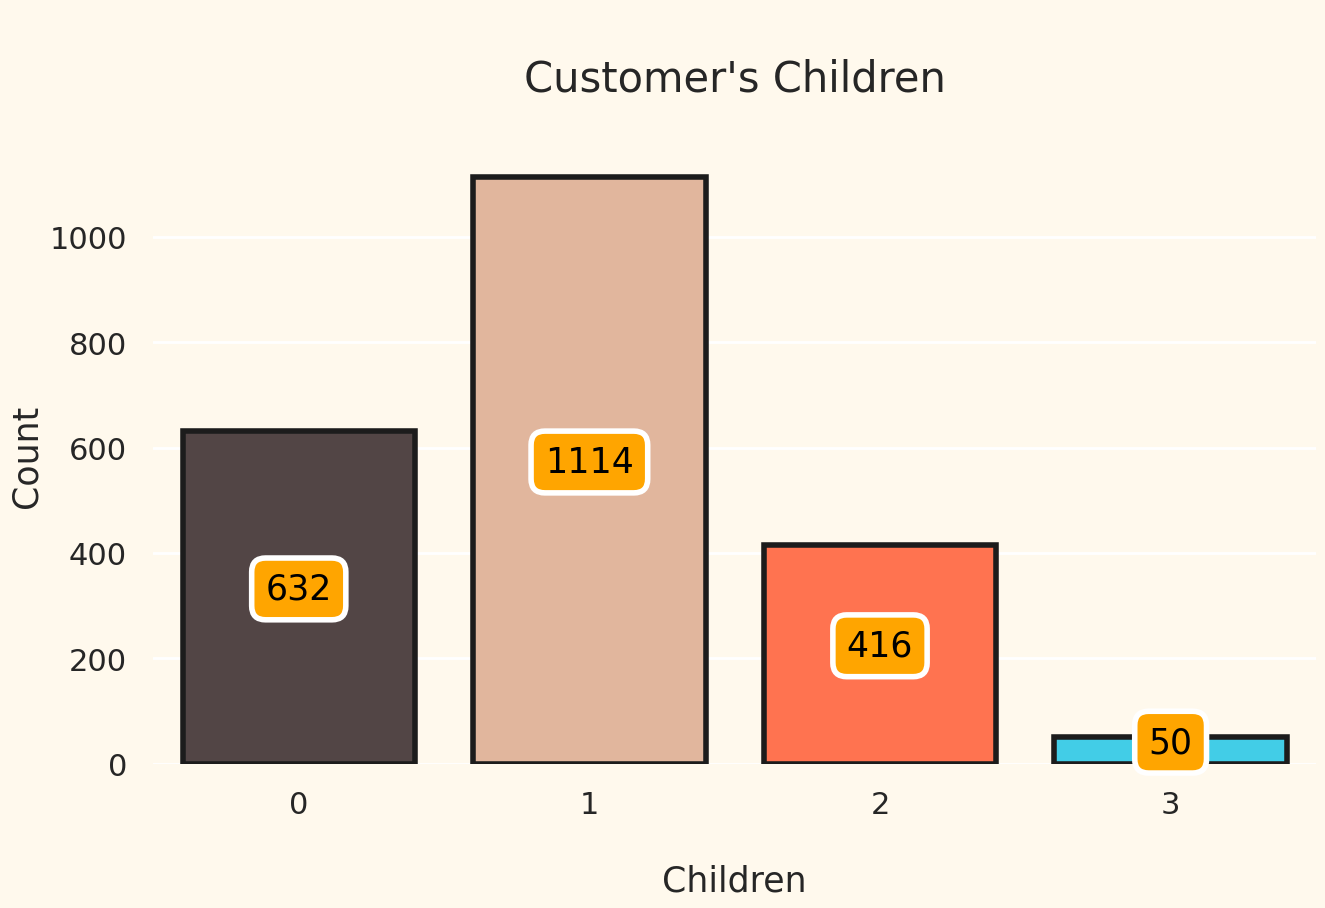

In [ ]:
print("The distribution of customer's children :")
plt.subplots(figsize=(15, 8))
p = sns.countplot(x=data["Children"], palette=["#524545","#E1B69D","#FF7350","#42CDE7"], saturation=1, edgecolor="#1c1c1c", linewidth=4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Children\n", fontsize=30)
p.axes.set_ylabel("Count", fontsize=25)
p.axes.set_xlabel("\nChildren", fontsize=25)
p.axes.set_xticklabels(p.get_xticklabels(), rotation=0, fontsize=22)  # Set fontsize for x-axis labels
p.axes.set_yticklabels(p.axes.get_yticklabels(), fontsize=22)  # Set fontsize for y-axis labels

for container in p.containers:
    p.bar_label(container, label_type="center", padding=6, size=25, color="black", rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth": 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

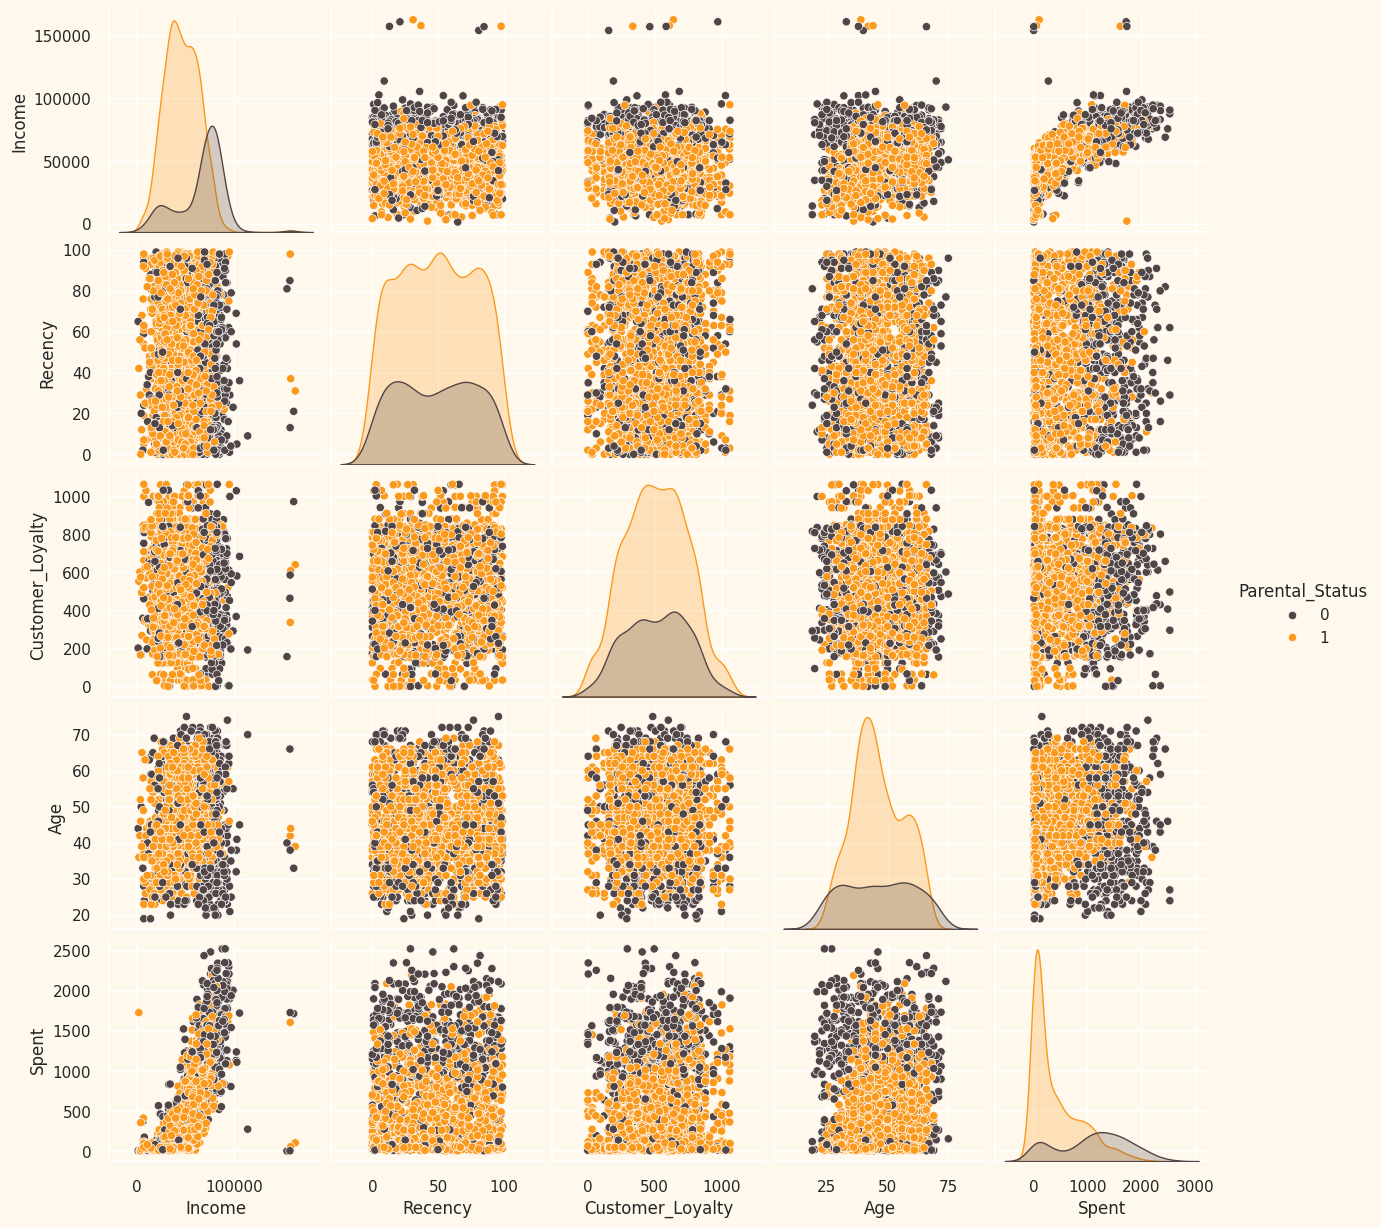

In [ ]:
# Setting up colors preferences
sns.set(rc={"axes.facecolor":"#FFF9ED", "figure.facecolor":"#FFF9ED"})

# Selecting features to plot
To_Plot = ["Income", "Recency", "Customer_Loyalty", "Age", "Spent", "Parental_Status"]
print("Relative Plot Of Some Selected Features: A Data Subset")

# Plotting the pairplot
plt.figure()
sns.pairplot(data[To_Plot], hue="Parental_Status", palette=["#524545","#FA991C"])
plt.show()


<a id="8"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Map</p>

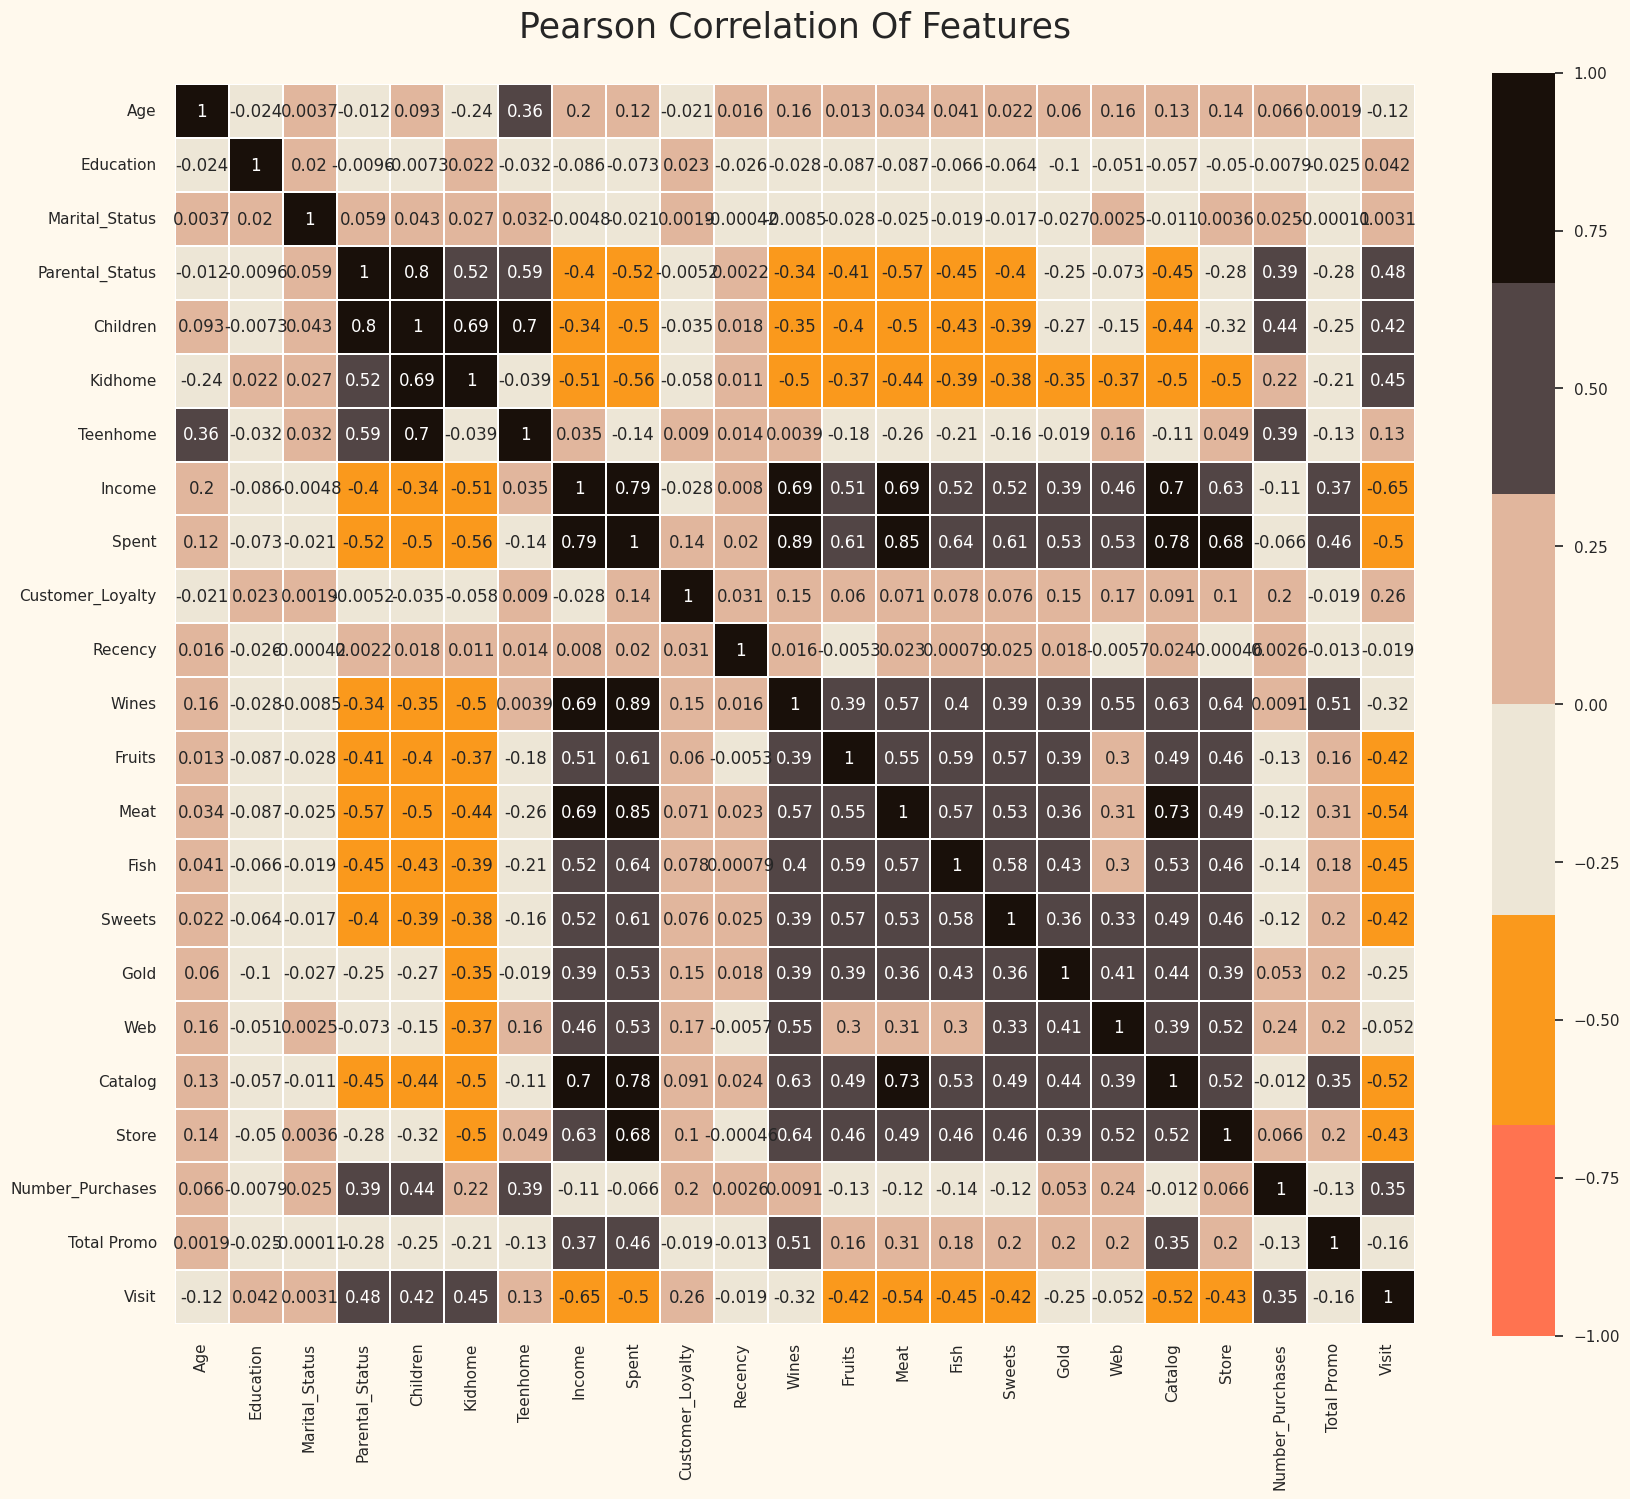

In [ ]:
data_corr = data[["ID","Age","Education","Marital_Status","Parental_Status","Children","Kidhome","Teenhome","Income","Spent","Customer_Loyalty","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Number_Purchases","Total Promo","Visit"]]

catcol = ["Education","Marital_Status"]
le = LabelEncoder()
for col in catcol:
        data_corr[col] = le.fit_transform(data_corr[col])


plt.subplots(figsize =(20, 20))

sns.heatmap(data_corr.drop(columns="ID").corr(), cmap = ["#FF7350","#FA991C","#EDE6D6","#E1B69D","#524545","#19100A"], square=True, cbar_kws=dict(shrink =.82),
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()



<a id="9"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dimensionality Reduction</p>

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [ ]:
data.head()

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          0               0  58138.0        0         0   
1  2174        1954          0               0  46344.0        1         1   
2  4141        1965          0               1  71613.0        0         0   
3  6182        1984          0               1  26646.0        1         0   
4  5324        1981          1               1  58293.0        1         0   

  Dt_Customer  Recency  Wines  ...  AcceptedCmp1  AcceptedCmp2  Response  \
0  2012-04-09       58    635  ...             0             0         1   
1  2014-08-03       38     11  ...             0             0         0   
2  2013-08-21       26    426  ...             0             0         0   
3  2014-10-02       26     11  ...             0             0         0   
4  2014-01-19       94    173  ...             0             0         0   

   Customer_Loyalty  Age  Spent  Children  Parental_Status  Family_Size  \
0               971   58   1617         0                0            1   
1               125   61     27         2                1            3   
2               472   50    776         0                0            2   
3                65   31     53         1                1            3   
4               321   34    422         1                1            3   

   Total Promo  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 33 columns]

In [ ]:
#Dropping some of the redundant features
to_drop = ["Dt_Customer", "ID"]
data_train = data.drop(to_drop, axis=1)

In [ ]:
#Creating a copy of data
ds = data_train.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0   -1.018352  -0.893586       -1.349603  0.287105 -0.822754 -0.929699   
1   -1.274785  -0.893586       -1.349603 -0.260882  1.040021  0.908097   
2   -0.334530  -0.893586        0.740959  0.913196 -0.822754 -0.929699   
3    1.289547  -0.893586        0.740959 -1.176114  1.040021 -0.929699   
4    1.033114   0.571657        0.740959  0.294307  1.040021 -0.929699   

    Recency     Wines    Fruits      Meat  ...   Catalog     Store     Visit  \
0  0.310353  0.977660  1.552041  1.690293  ...  2.503607 -0.555814  0.692181   
1 -0.380813 -0.872618 -0.637461 -0.718230  ... -0.571340 -1.171160 -0.132545   
2 -0.795514  0.357935  0.570540 -0.178542  ... -0.229679  1.290224 -0.544908   
3 -0.795514 -0.872618 -0.561961 -0.655787  ... -0.913000 -0.555814  0.279818   
4  1.554453 -0.392257  0.419540 -0.218684  ...  0.111982  0.059532 -0.132545   

   Customer_Loyalty       Age     Spent  Children  Parental_Status  \
0          1.973583  1.018352  1.676245 -1.264598        -1.581139   
1         -1.665144  1.274785 -0.963297  1.404572         0.632456   
2         -0.172664  0.334530  0.280110 -1.264598        -1.581139   
3         -1.923210 -1.289547 -0.920135  0.069987         0.632456   
4         -0.822130 -1.033114 -0.307562  0.069987         0.632456   

   Family_Size  Total Promo  
0    -1.758359     -0.43916  
1     0.449070     -0.43916  
2    -0.654644     -0.43916  
3     0.449070     -0.43916  
4     0.449070     -0.43916  

[5 rows x 25 columns]

In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  4.497106e-17  2.908555 -5.929187 -2.595836 -0.807009  2.328800   
col2  2212.0  5.139550e-17  1.773811 -4.686789 -1.423000 -0.003276  1.347958   
col3  2212.0  4.015273e-17  1.381614 -4.481367 -0.960889  0.091751  0.962677   

           max  
col1  7.781506  
col2  6.151100  
col3  4.792593

Elbow Method to determine the number of clusters to be formed:


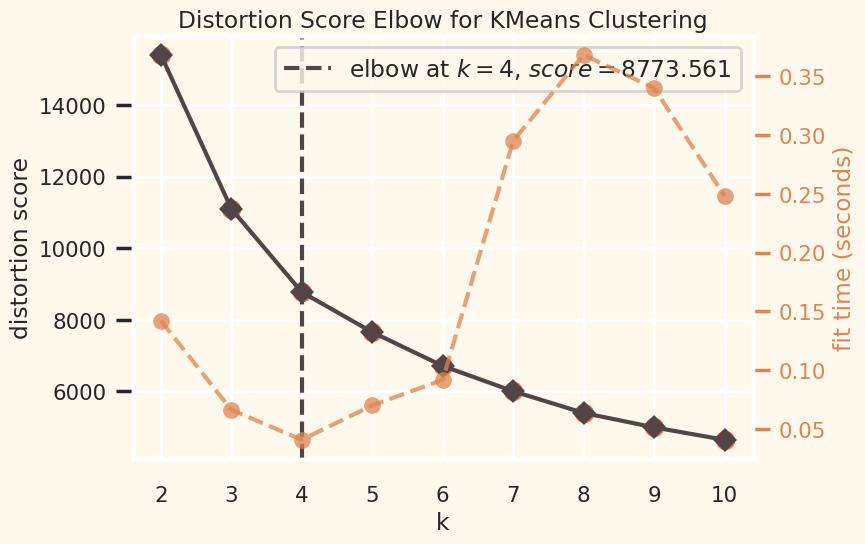

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method to determine the number of clusters to be formed
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)

# Accessing the plot and changing the trendline color
for line in Elbow_M.ax.lines:
    line.set_color("#524545")  # Change the color of the lines (trendline)

# Customize the color of the points if desired
Elbow_M.ax.scatter(Elbow_M.k_values_, Elbow_M.k_scores_, color="#FF7350")

Elbow_M.show()

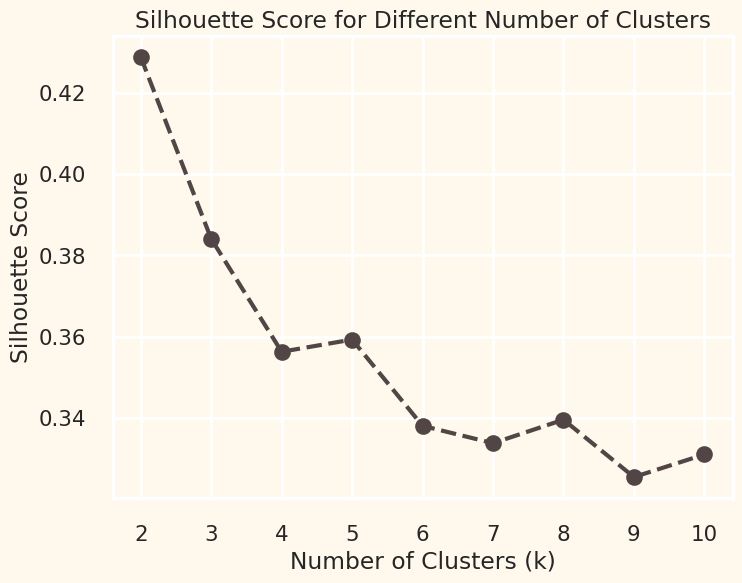

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(PCA_ds)
    silhouette_avg = silhouette_score(PCA_ds, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='#524545')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')
plt.grid(True)
plt.show()

Silhouette Score indicates that fewer clusters (such as 2 or 3) might offer slightly better separation, but 4 clusters is still a reasonable choice.

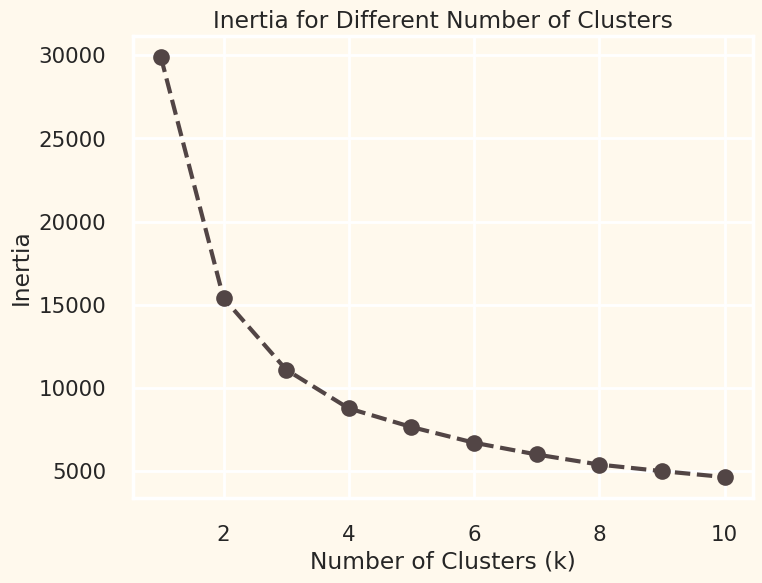

In [ ]:
# Calculate Inertia for different numbers of clusters
inertia_values = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(PCA_ds)
    inertia_values.append(kmeans.inertia_)

# Plot Inertia
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--', color='#524545')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia for Different Number of Clusters')
plt.grid(True)
plt.show()

Inertia suggests that adding more clusters continues to improve the fit, but the improvements become less significant after 4 clusters, indicating that you might be nearing an optimal number.

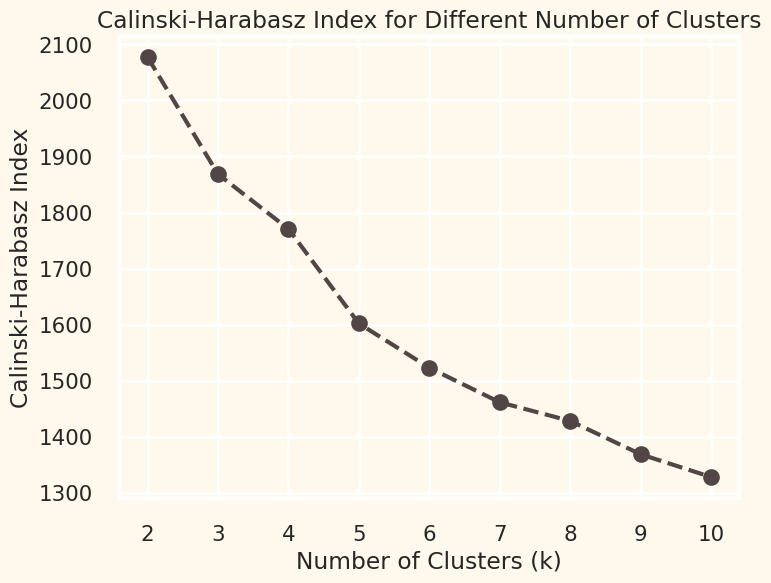

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz Index for different numbers of clusters
ch_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(PCA_ds)
    ch_score = calinski_harabasz_score(PCA_ds, cluster_labels)
    ch_scores.append(ch_score)

# Plot Calinski-Harabasz Index
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), ch_scores, marker='o', linestyle='--', color='#524545')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different Number of Clusters')
plt.grid(True)
plt.show()

Calinski-Harabasz Index shows a steady decrease, implying that fewer clusters could offer better results in terms of overall variance explained.

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

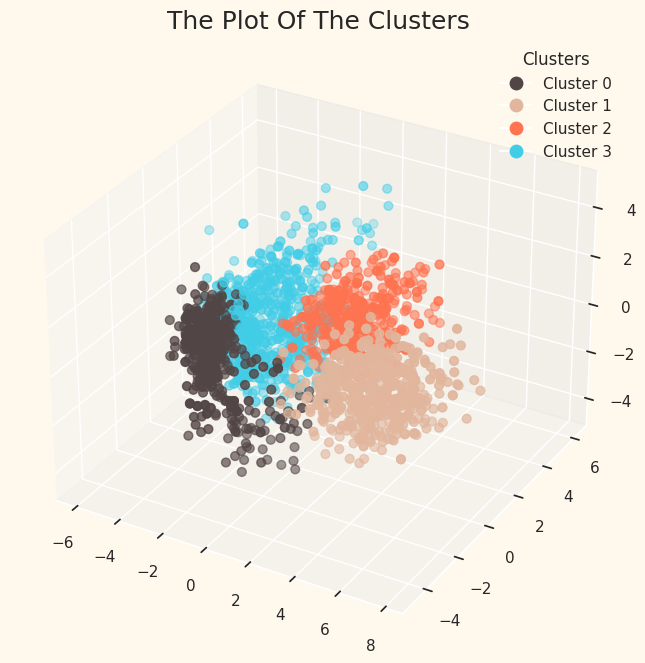

In [ ]:
# Define the colormap and cluster labels starting from zero
cmap = colors.ListedColormap(["#524545", "#E1B69D", "#FF7350", "#42CDE7"])
cluster_labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]  # Adjusted to start from 0

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')
sc = ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)

# Add a title
ax.set_title("The Plot Of The Clusters", fontsize=18)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cluster_labels[i],
                      markersize=10, markerfacecolor=cmap(i)) for i in range(len(cluster_labels))]
ax.legend(handles=handles, title="Clusters", loc="best")

# Show the plot
plt.show()

<a id="10"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Customer Segmentation</p>

In [ ]:
km = KMeans(n_clusters = 4,random_state = 42)
# ac = AgglomerativeClustering(n_clusters=4)

y_km = km.fit_predict(PCA_ds)
PCA_ds["Clusters"] = y_km
data["Clusters"]= y_km

Customers quantity distribution after clustering :


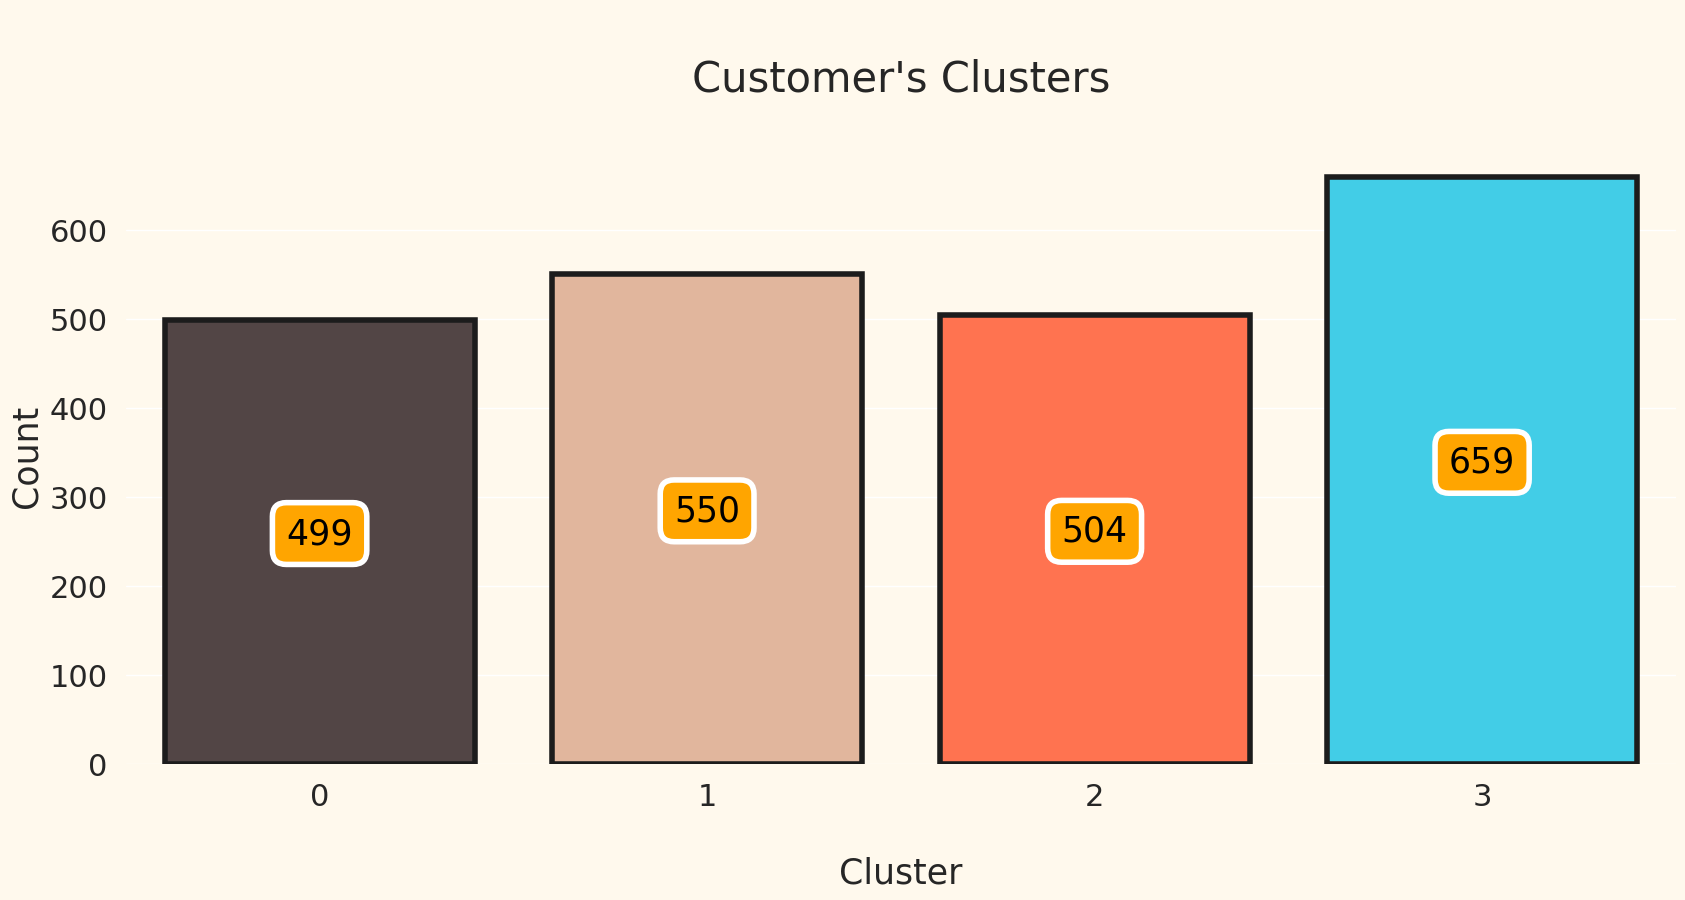

In [ ]:
print("Customers quantity distribution after clustering :")

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Clusters"],palette=["#524545","#E1B69D","#FF7350","#42CDE7"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Clusters\n",fontsize=30)
p.axes.set_ylabel("Count",fontsize=25)
p.axes.set_xlabel("\nCluster",fontsize=25)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
p.axes.set_xticklabels(p.get_xticklabels(), rotation=0, fontsize=22)  # Set fontsize for x-axis labels
p.axes.set_yticklabels(p.axes.get_yticklabels(), fontsize=22)  # Set fontsize for y-axis labels
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Characteristics of the clusters on the basis of income and spending :


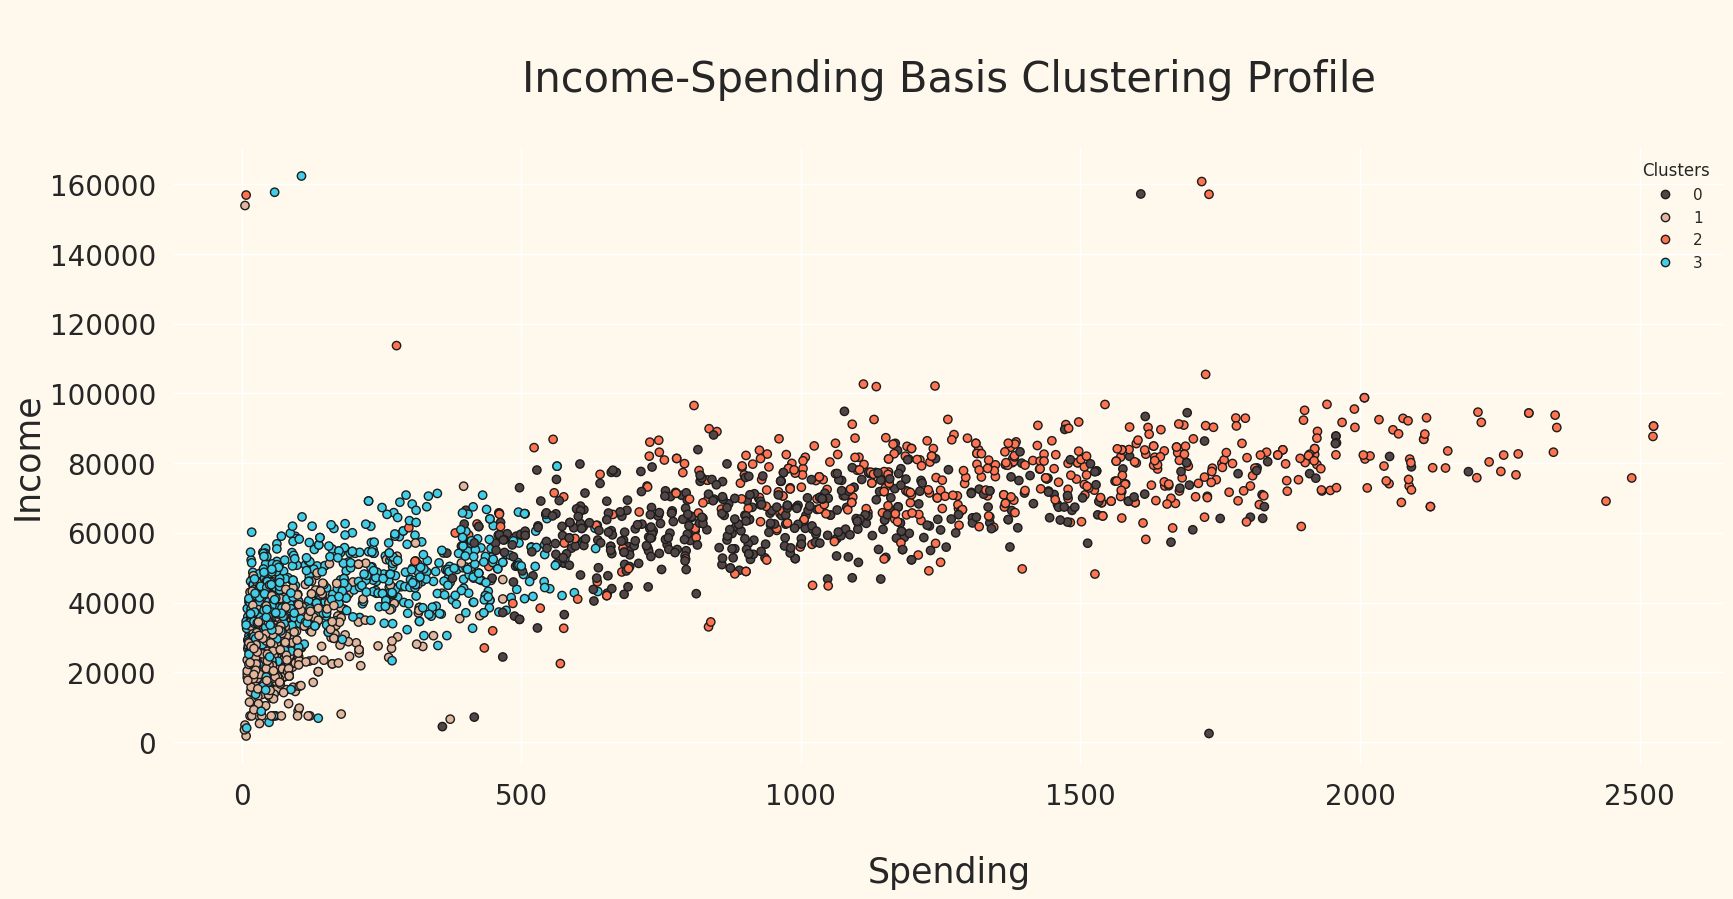

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Characteristics of the clusters on the basis of income and spending :")

_, axes = plt.subplots(figsize=(20, 8))
sns.scatterplot(x=data["Spent"], y=data["Income"], hue=data["Clusters"], palette=["#524545","#E1B69D","#FF7350","#42CDE7"], sizes=60, alpha=1, edgecolor="#1c1c1c", linewidth=1)
axes.set_title("\nIncome-Spending Basis Clustering Profile\n", fontsize=30)
axes.set_ylabel("Income", fontsize=25)
axes.set_xlabel("\nSpending", fontsize=25)
axes.set_xticklabels(axes.get_xticklabels(), fontsize=20)  # Set fontsize for x-axis labels
axes.set_yticklabels(axes.get_yticklabels(), fontsize=20)  # Set fontsize for y-axis labels

sns.despine(left=True, bottom=True)
plt.show()


Characteristics of the clusters on the basis of spending :


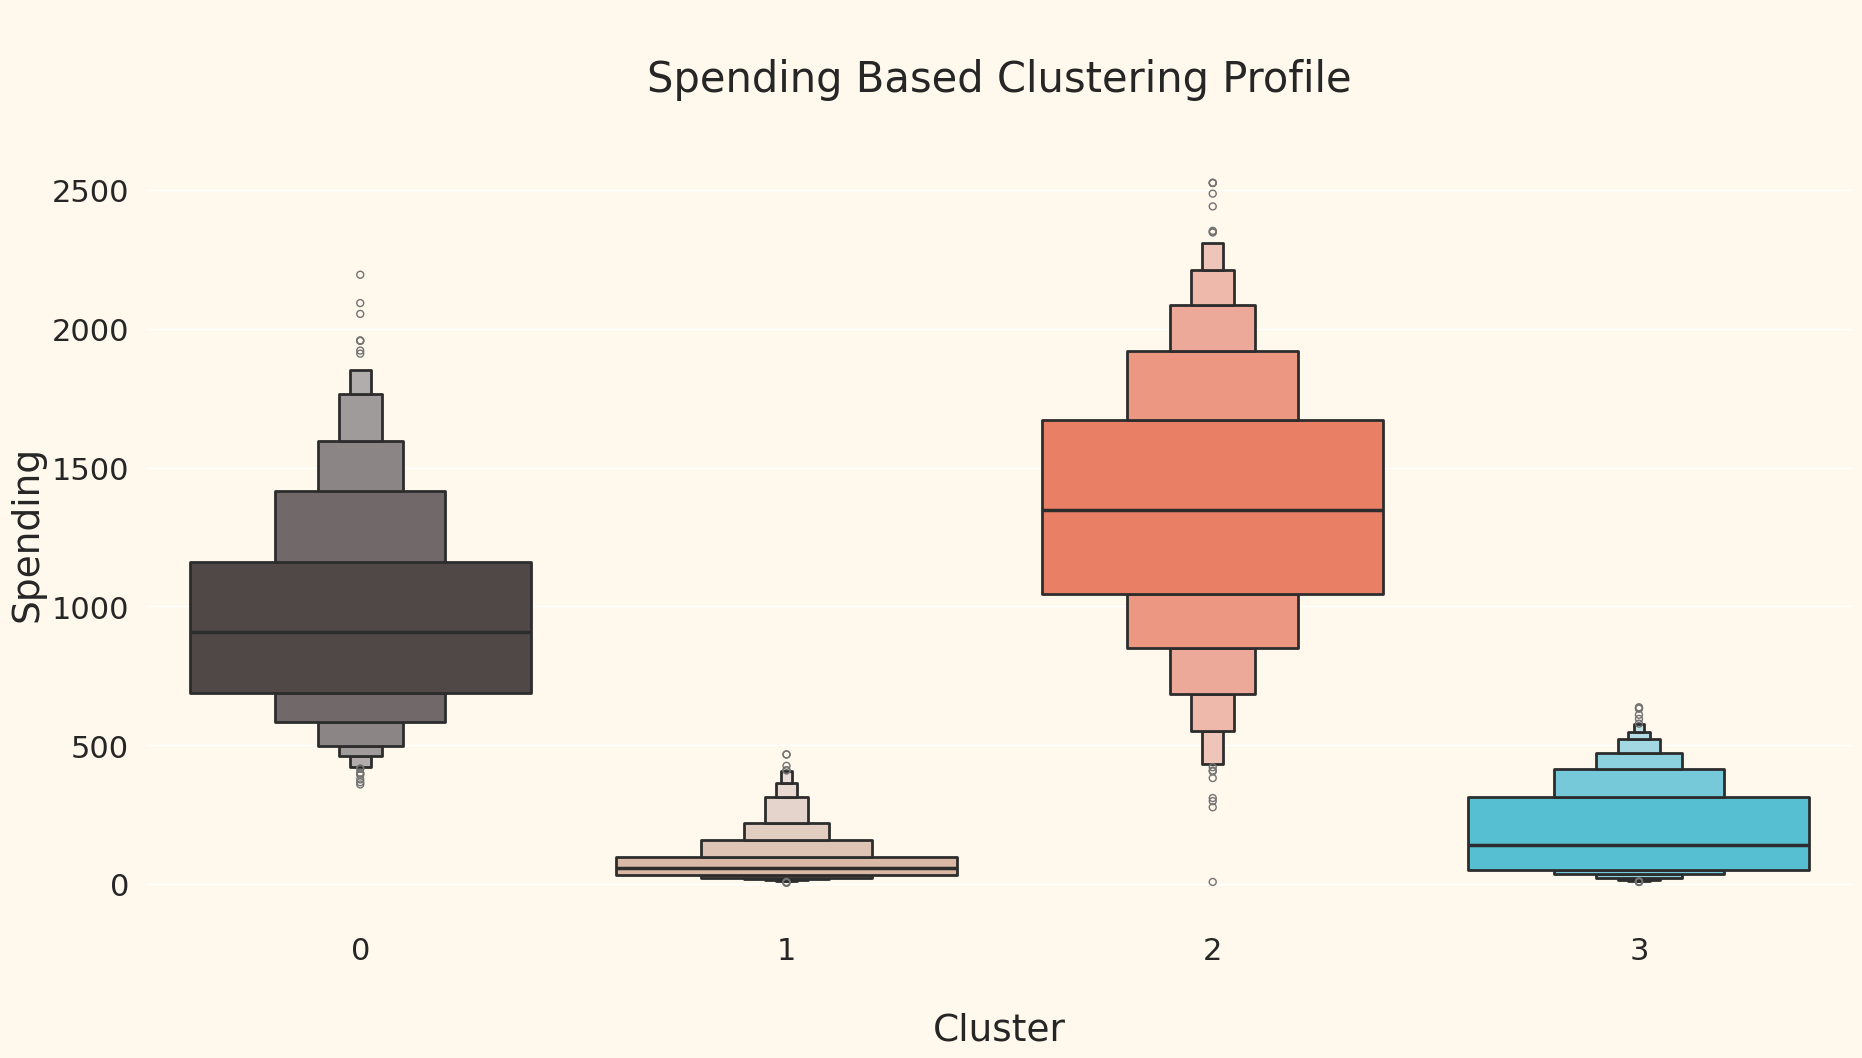

In [ ]:
print(f"Characteristics of the clusters on the basis of spending :")

_, axes = plt.subplots(figsize=(22, 10))
sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=["#524545","#E1B69D","#FF7350","#42CDE7"], linewidth=2)

axes.set_title("\nSpending Based Clustering Profile\n",fontsize=30)
axes.set_ylabel("Spending",fontsize=27)
axes.set_xlabel("\nCluster",fontsize=27)
axes.set_xticklabels(axes.get_xticklabels(), fontsize=22)  # Set fontsize for x-axis labels
axes.set_yticklabels(axes.get_yticklabels(), fontsize=22)

sns.despine(left=True, bottom=True)
plt.show()

Characteristics of the clusters on the basis of accepting promotions :


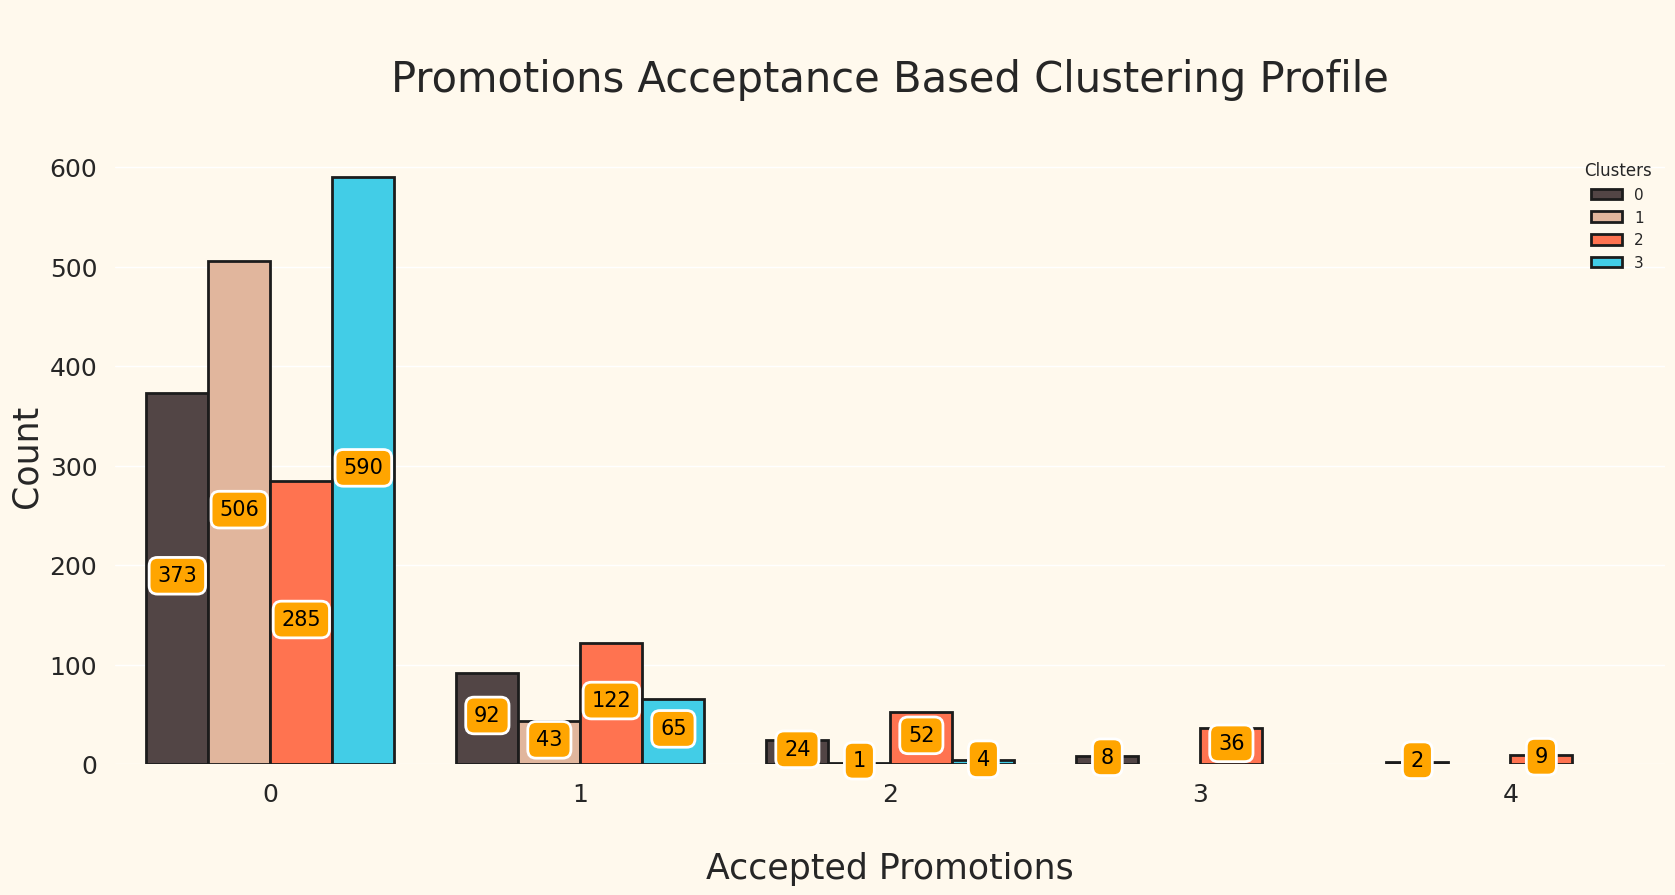

In [ ]:
print(f"Characteristics of the clusters on the basis of accepting promotions :")

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Total Promo"],hue=data["Clusters"],palette=["#524545","#E1B69D","#FF7350","#42CDE7"], saturation=1,edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_yscale("linear")
p.axes.set_title("\nPromotions Acceptance Based Clustering Profile\n",fontsize=30)
p.axes.set_ylabel("Count",fontsize=25)
p.axes.set_xlabel("\nAccepted Promotions",fontsize=25)
p.axes.set_xticklabels(p.get_xticklabels(), rotation=0, fontsize=18)  # Set fontsize for x-axis labels
p.axes.set_yticklabels(p.axes.get_yticklabels(), fontsize=18)  # Set fontsize for y-axis labels

for container in p.containers:
    p.bar_label(container,label_type="center",padding=2,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 2, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Characteristics of the clusters on the basis of Number of Purchases :


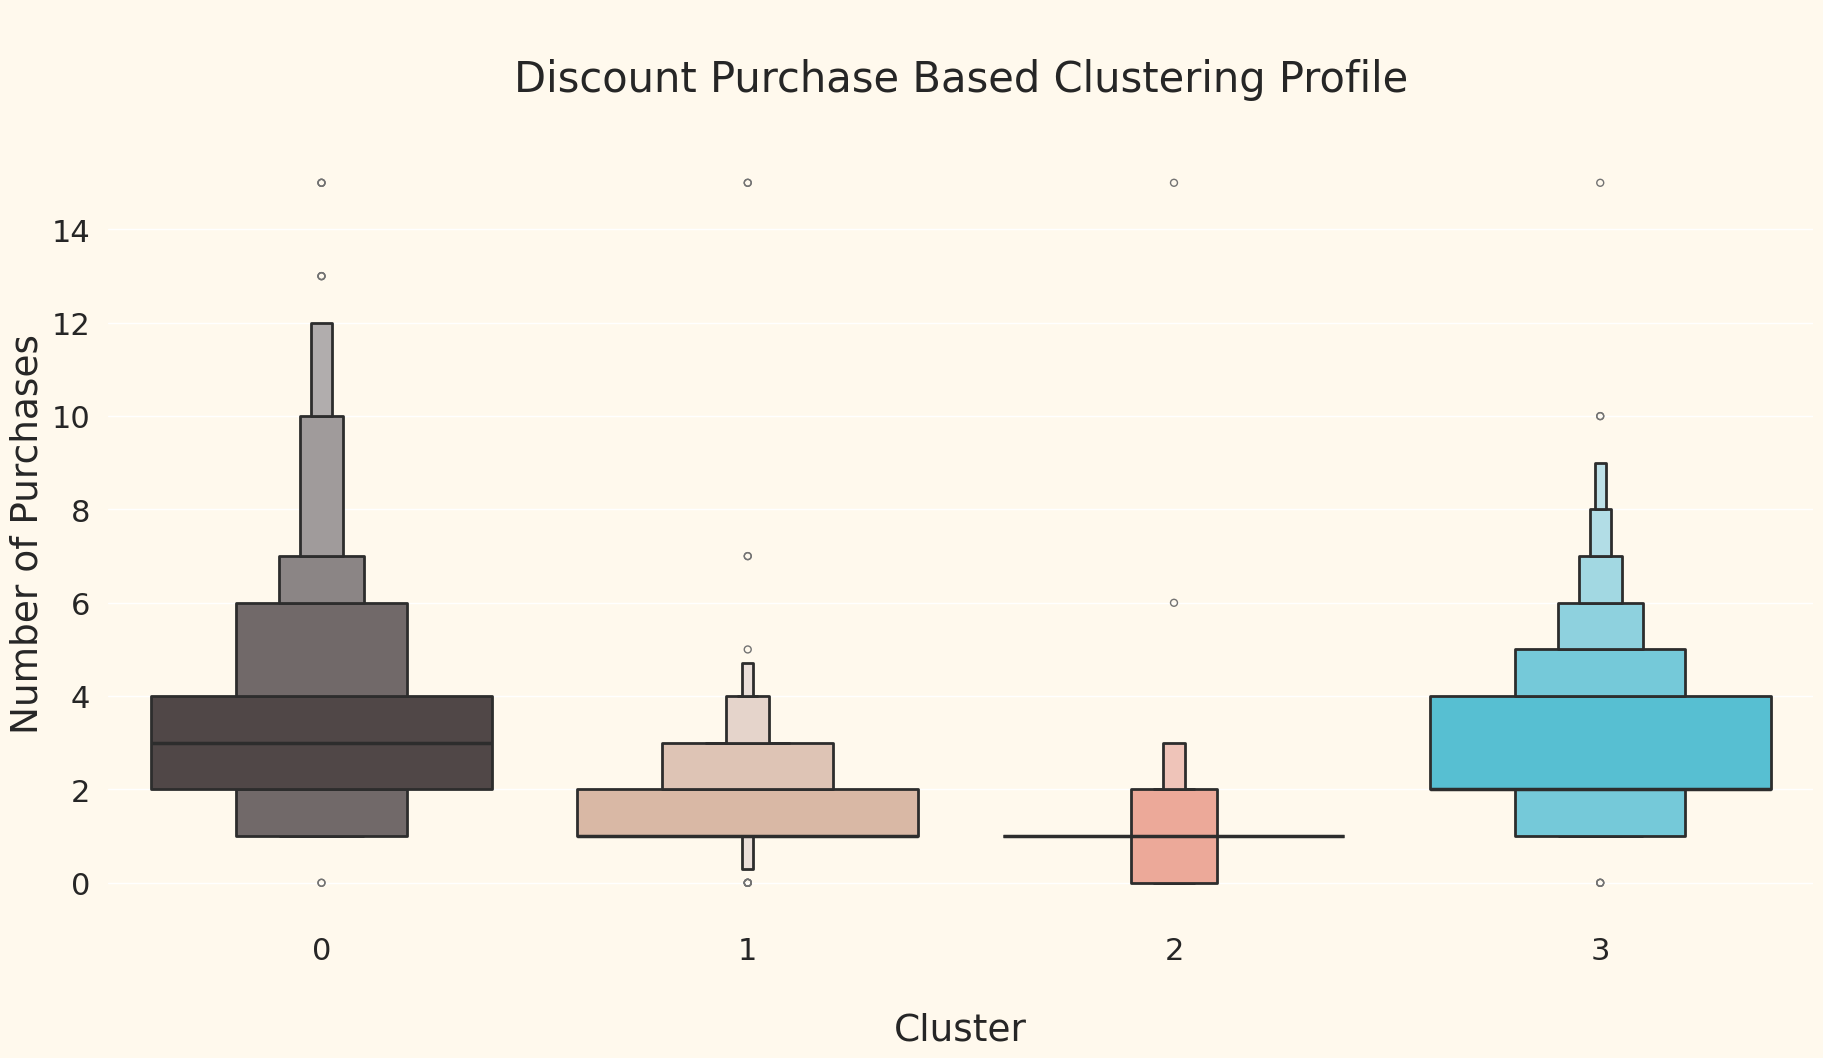

In [ ]:
print(f"Characteristics of the clusters on the basis of Number of Purchases :")

_, axes = plt.subplots(figsize=(22,10))
sns.boxenplot(x=data["Clusters"], y=data["Number_Purchases"], palette=["#524545","#E1B69D","#FF7350","#42CDE7"], linewidth=2)

axes.set_title("\nDiscount Purchase Based Clustering Profile\n",fontsize=30)
axes.set_ylabel("Number of Purchases",fontsize=27)
axes.set_xlabel("\nCluster",fontsize=27)
axes.set_xticklabels(axes.get_xticklabels(), fontsize=22)  # Set fontsize for x-axis labels
axes.set_yticklabels(axes.get_yticklabels(), fontsize=22)

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
# Define a function to plot the relationship between a feature and "Spent" for different clusters
def cluster(feature):
    plt.figure()
    sns.jointplot(x=data[feature], y=data["Spent"], hue=data["Clusters"], kind="kde", palette=["#524545","#E1B69D","#FF7350","#42CDE7"], height=7)
    plt.show()

Characteristics of clusters based on spending and having childern :


<Figure size 800x550 with 0 Axes>

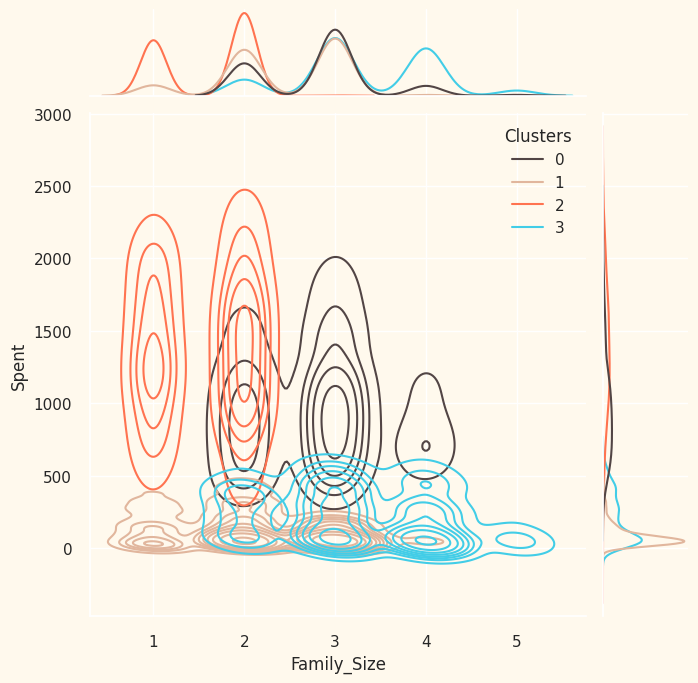

In [ ]:
print(f"Characteristics of clusters based on spending and having childern :")
cluster("Family_Size")

Characteristics of clusters based on spending and having childern :


<Figure size 800x550 with 0 Axes>

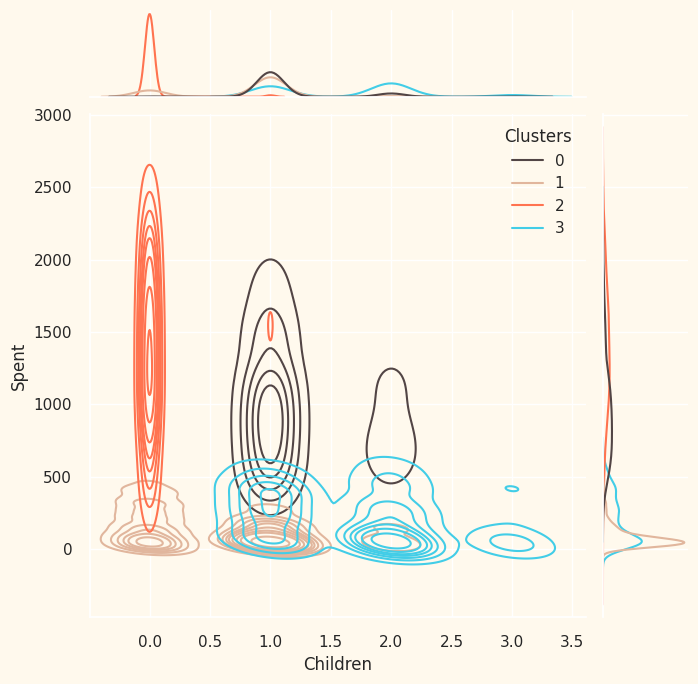

In [ ]:
print(f"Characteristics of clusters based on spending and having childern :")
cluster("Children")

Characteristics of clusters based on spending and age :


<Figure size 800x550 with 0 Axes>

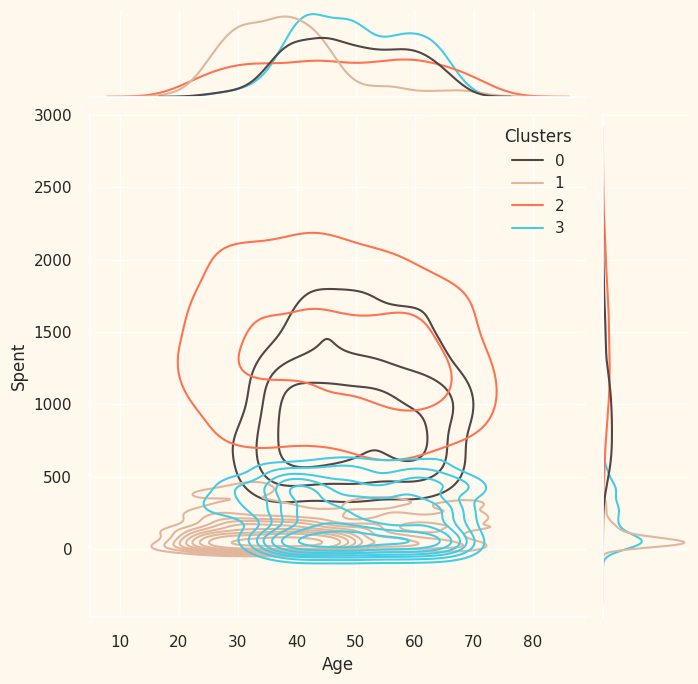

In [ ]:
print(f"Characteristics of clusters based on spending and age :")
cluster("Age")

Characteristics of clusters based on spending and education level :


<Figure size 800x550 with 0 Axes>

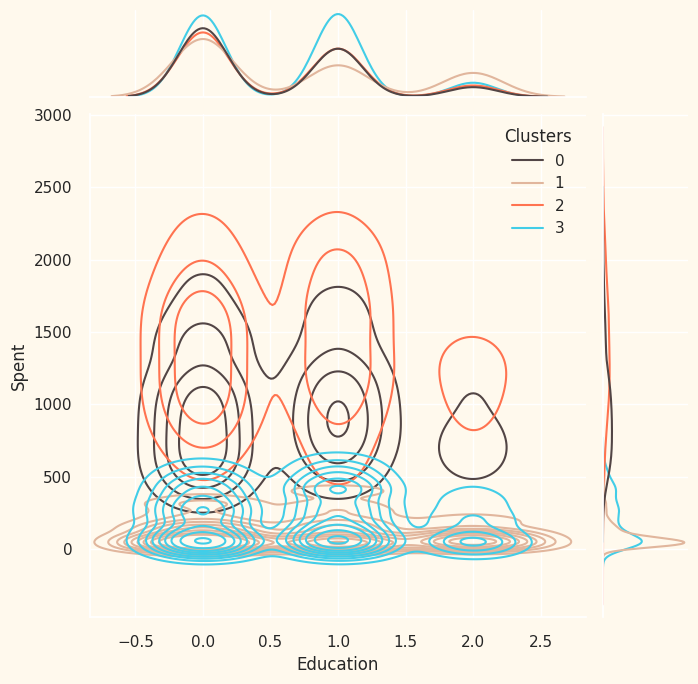

In [ ]:
print(f"Characteristics of clusters based on spending and education level :")
cluster("Education")

Characteristics of clusters based on spending and marital status :


<Figure size 800x550 with 0 Axes>

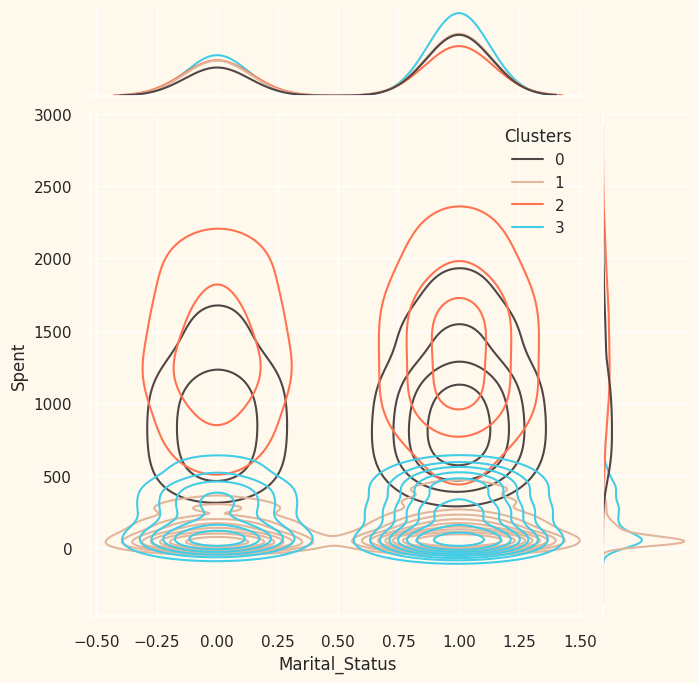

In [ ]:
print(f"Characteristics of clusters based on spending and marital status :")
cluster("Marital_Status")

Characteristics of clusters based on spending and parental status :


<Figure size 800x550 with 0 Axes>

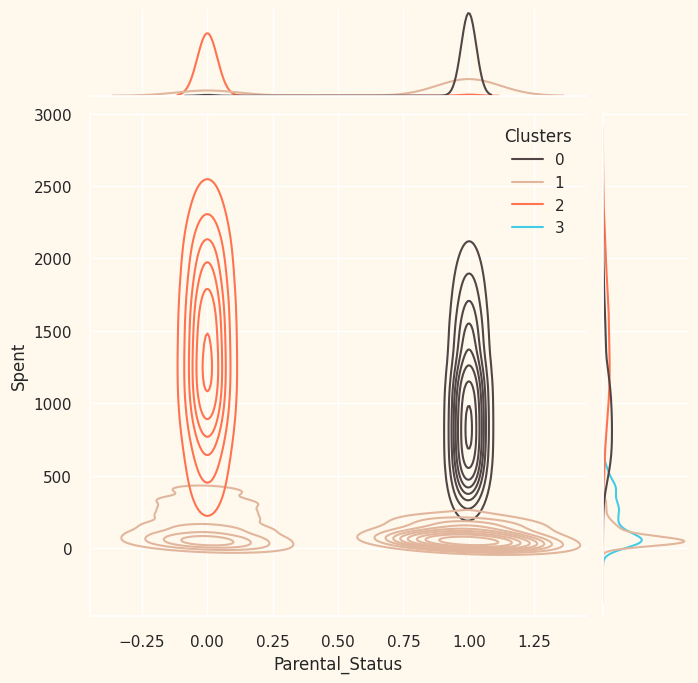

In [ ]:
print(f"Characteristics of clusters based on spending and parental status :")
cluster("Parental_Status")

Characteristics of clusters based on spending and customer loyalty :


<Figure size 800x550 with 0 Axes>

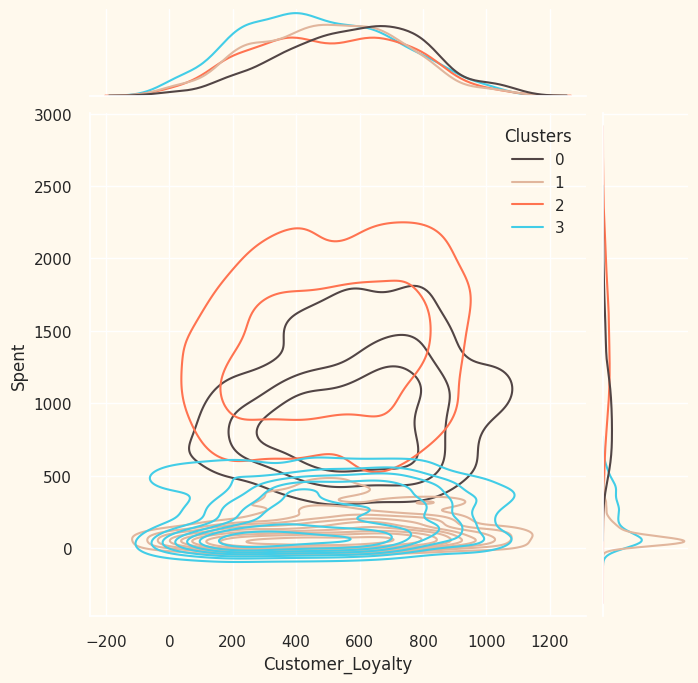

In [ ]:
print(f"Characteristics of clusters based on spending and customer loyalty :")
cluster("Customer_Loyalty")

✍🏼 **Insights**

* Cluster 0 consist parents with relatively large family sizes, and has relatively high spending.
* Cluster 1 with the majority of parents shows the lowest spending, and some of them are  undergraduate.
* Cluster 2 with non-parent status and education above undergraduate has the highest spending.
* Cluster 3 with large family size shows relatively low spending, despite some having education beyond undergraduate.

In [ ]:
# Define a function to plot the relationship between a feature and "Spent" for different clusters
def clusters(feature):
    # Create a larger figure size
    plt.figure()
    sns.jointplot(
        x=data[feature], y=data["Spent"], hue=data["Clusters"],
        palette=["#524545","#E1B69D","#FF7350","#42CDE7"], height=7)
    plt.show()

Characteristics of clusters based on spending and customer loyalty :


<Figure size 800x550 with 0 Axes>

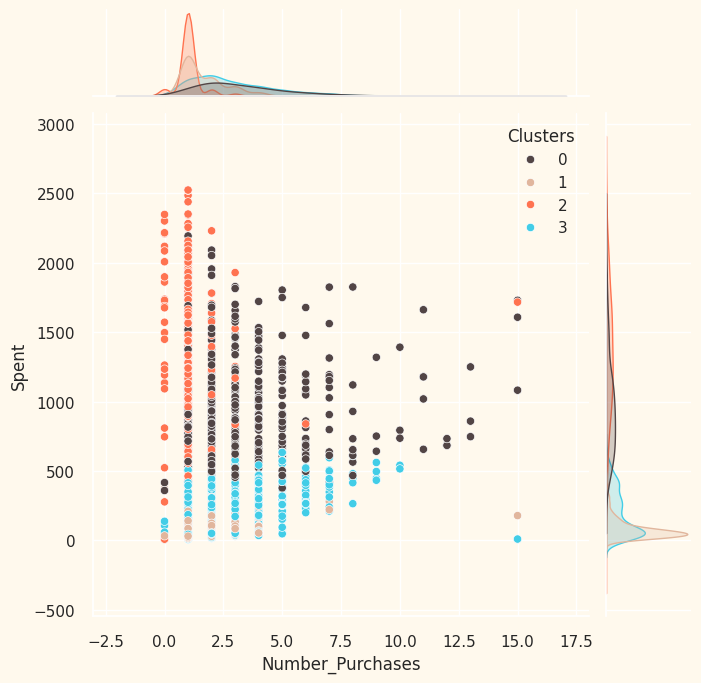

In [ ]:
print(f"Characteristics of clusters based on spending and customer loyalty :")
clusters("Number_Purchases")

Characteristics of clusters based on spending and customer loyalty :


<Figure size 800x550 with 0 Axes>

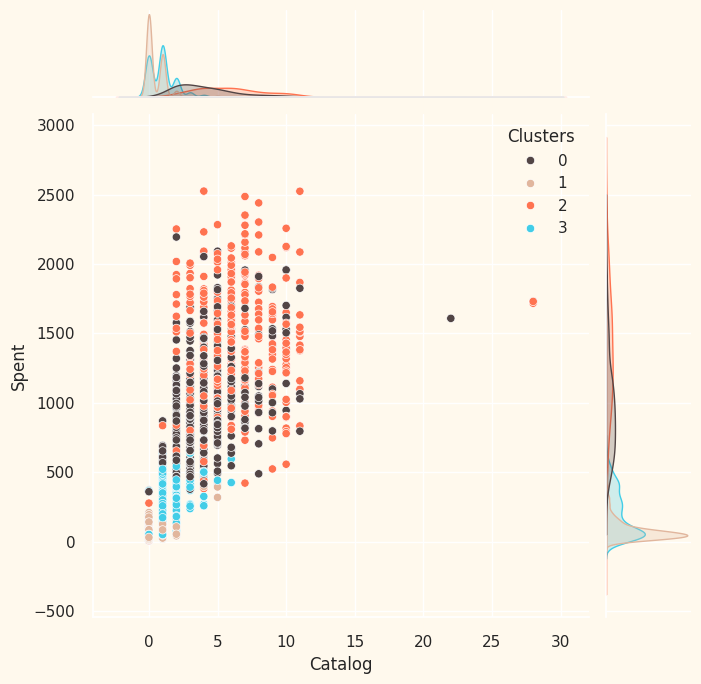

In [ ]:
print(f"Characteristics of clusters based on spending and customer loyalty :")
clusters("Catalog")

Characteristics of clusters based on spending and customer loyalty :


<Figure size 800x550 with 0 Axes>

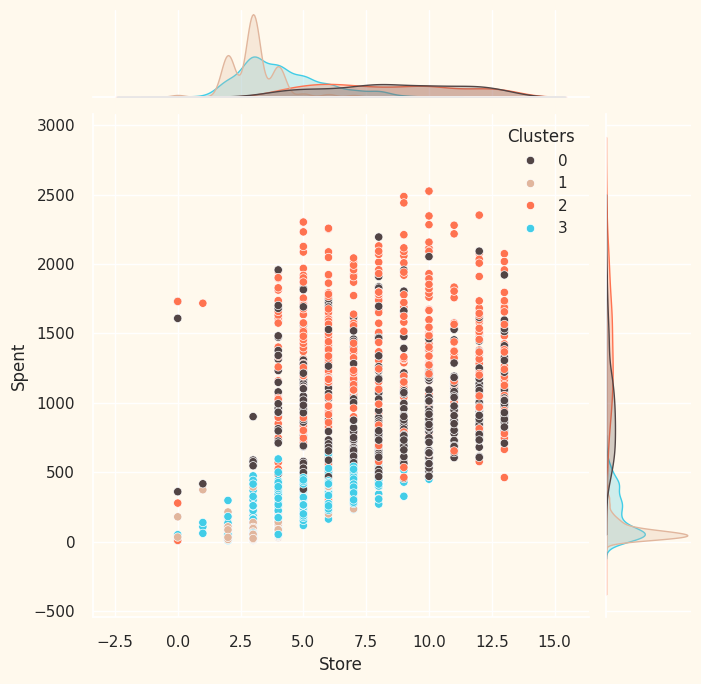

In [ ]:
print(f"Characteristics of clusters based on spending and customer loyalty :")
clusters("Store")

Characteristics of clusters based on spending and customer loyalty :


<Figure size 800x550 with 0 Axes>

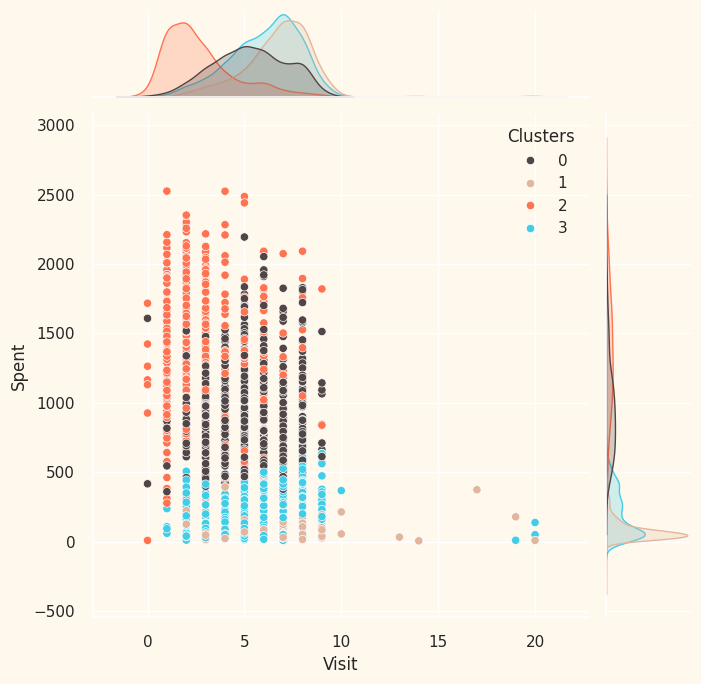

In [ ]:
print(f"Characteristics of clusters based on spending and customer loyalty :")
clusters("Visit")

✍🏼 **Insights**

* Cluster 0 frequently makes purchases with relatively moderate spending and prefers in-store shopping.
* Cluster 1 has very minimal spending, though they make occasional purchases.
* Cluster 2 exhibits the highest spending, despite purchases less frequently, and prefers in-store shopping.
* Cluster 3 often makes purchases through both stores and websites but has relatively low spending.

💡 **Conclusions**

* Cluster 0: High spending across various income levels, indicating that customers tend to spend a significant amount regardless of their income.
* Cluster 1: Low to moderate income with very low spending, suggesting that customers are very cautious with their spending or have income constraints.
* Cluster 2: Middle to high income with a diverse range of spending.
* Cluster 3: Low to moderate income with relatively low spending, reflecting customers who are budget-conscious.